Loading and inspecting the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#reading the dataset
url = 'archive (2)/household_power_consumption.csv'
ds = pd.read_csv(url)

In [2]:
from datetime import datetime

# Since the dates are in irregular form, convert these dates to dd/mm/yyyy form:
# Function to convert date to the desired format


def convert_to_full_year(date_str):
    try:
        parsed_date = datetime.strptime(date_str, '%d/%m/%y')
        converted_date = parsed_date.strftime('%d/%m/%Y')

        return converted_date
    except ValueError:
        return date_str


ds['Date'] = ds['Date'].apply(convert_to_full_year)


In [3]:
# Convert 'Date' and 'Time' columns to datetime format
ds['Date'] = pd.to_datetime(ds['Date'], format='%d/%m/%Y')
ds['Time'] = pd.to_timedelta(ds['Time'])


In [4]:
#read the head
ds.head()

,index,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,0,2007-01-01,0 days 00:00:00,2.58,0.136,241.97,10.6,0,0,0.0
1,1,2007-01-01,0 days 00:01:00,2.552,0.1,241.75,10.4,0,0,0.0
2,2,2007-01-01,0 days 00:02:00,2.55,0.1,241.64,10.4,0,0,0.0
3,3,2007-01-01,0 days 00:03:00,2.55,0.1,241.71,10.4,0,0,0.0
4,4,2007-01-01,0 days 00:04:00,2.554,0.1,241.98,10.4,0,0,0.0


In [5]:
#data info
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260640 entries, 0 to 260639
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype          
---  ------                 --------------   -----          
 0   index                  260640 non-null  int64          
 1   Date                   260640 non-null  datetime64[ns] 
 2   Time                   260640 non-null  timedelta64[ns]
 3   Global_active_power    260640 non-null  object         
 4   Global_reactive_power  260640 non-null  object         
 5   Voltage                260640 non-null  object         
 6   Global_intensity       260640 non-null  object         
 7   Sub_metering_1         260640 non-null  object         
 8   Sub_metering_2         260640 non-null  object         
 9   Sub_metering_3         256869 non-null  float64        
dtypes: datetime64[ns](1), float64(1), int64(1), object(6), timedelta64[ns](1)
memory usage: 19.9+ MB


In [6]:
# summary statistics for numerical columns
ds.describe()

,index,Time,Sub_metering_3
count,260640.000000,260640,256869.000000
mean,130319.500000,0 days 11:59:30,5.831825
std,75240.431418,0 days 06:55:41.573461759,8.186709
min,0.000000,0 days 00:00:00,0.000000
25%,65159.750000,0 days 05:59:45,0.000000
50%,130319.500000,0 days 11:59:30,0.000000
75%,195479.250000,0 days 17:59:15,17.000000
max,260639.000000,0 days 23:59:00,20.000000


In [7]:
# summary statistics for categorical columns
ds.describe(include=['object'])

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2
count,260640,260640,260640,260640,260640,260640
unique,3585,414,2276,200,79,80
top,?,0,?,1.4,0,0
freq,3771,65262,3771,23579,233670,173493


In [8]:
missing_values = ds[ds == '?'].count()
missing_values

index                       0
Date                        0
Time                        0
Global_active_power      3771
Global_reactive_power    3771
Voltage                  3771
Global_intensity         3771
Sub_metering_1           3771
Sub_metering_2           3771
Sub_metering_3              0
dtype: int64

In [9]:
rows_with_missing_values = ds[ds.isnull().any(axis=1)]
rows_with_missing_values


,index,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
19836,19836,2007-01-14,0 days 18:36:00,?,?,?,?,?,?,NaN
39913,39913,2007-01-28,0 days 17:13:00,?,?,?,?,?,?,NaN
76258,76258,2007-02-22,0 days 22:58:00,?,?,?,?,?,?,NaN
76259,76259,2007-02-22,0 days 22:59:00,?,?,?,?,?,?,NaN
120592,120592,2007-03-25,0 days 17:52:00,?,?,?,?,?,?,NaN
...,...,...,...,...,...,...,...,...,...,...
230070,230070,2007-06-09,0 days 18:30:00,?,?,?,?,?,?,NaN
230071,230071,2007-06-09,0 days 18:31:00,?,?,?,?,?,?,NaN
244094,244094,2007-06-19,0 days 12:14:00,?,?,?,?,?,?,NaN
244095,244095,2007-06-19,0 days 12:15:00,?,?,?,?,?,?,NaN


In [10]:
ds.replace('?', np.nan, inplace=True)

In [11]:
df = ds.dropna()


In [12]:
# Check for missing values
print(df.isnull().sum())


index                    0
Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64


In [13]:
rows_with_missing_values = df[df.isnull().any(axis=1)]
rows_with_missing_values


,index,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3


In [14]:
# number of rows and columns in the DataFrame
df.shape


(256869, 10)

In [15]:
df.isnull().sum()


index                    0
Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [16]:
df.corr()

,index,Sub_metering_3
index,1.000000,-0.128638
Sub_metering_3,-0.128638,1.000000


Time Series Analysis

In [17]:
df.head()

,index,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,0,2007-01-01,0 days 00:00:00,2.58,0.136,241.97,10.6,0,0,0.0
1,1,2007-01-01,0 days 00:01:00,2.552,0.1,241.75,10.4,0,0,0.0
2,2,2007-01-01,0 days 00:02:00,2.55,0.1,241.64,10.4,0,0,0.0
3,3,2007-01-01,0 days 00:03:00,2.55,0.1,241.71,10.4,0,0,0.0
4,4,2007-01-01,0 days 00:04:00,2.554,0.1,241.98,10.4,0,0,0.0


VISUALIZATIONS FOR OUTLIERS USING BOXPLOT

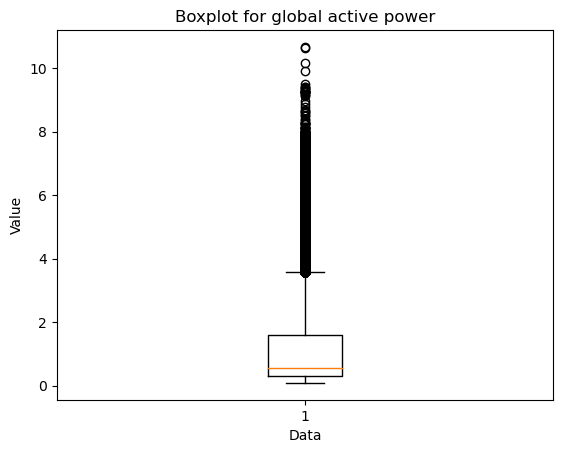

In [18]:
plt.boxplot(df['Global_active_power'].astype('float'))

# Add labels and title
plt.xlabel('Data')
plt.ylabel('Value')
plt.title('Boxplot for global active power')

# Show the plot
plt.show()

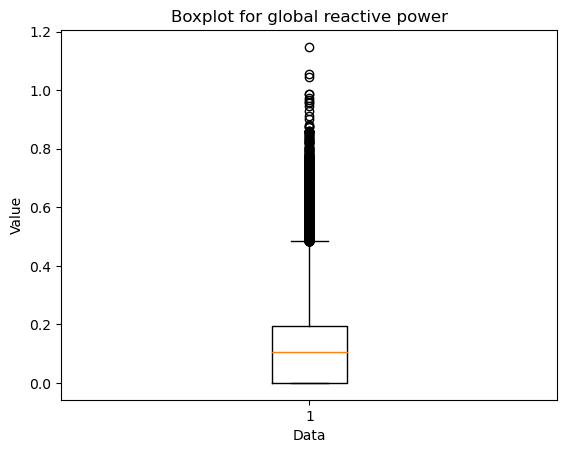

In [19]:
plt.boxplot(df['Global_reactive_power'].astype('float'))

# Add labels and title
plt.xlabel('Data')
plt.ylabel('Value')
plt.title('Boxplot for global reactive power')

# Show the plot
plt.show()

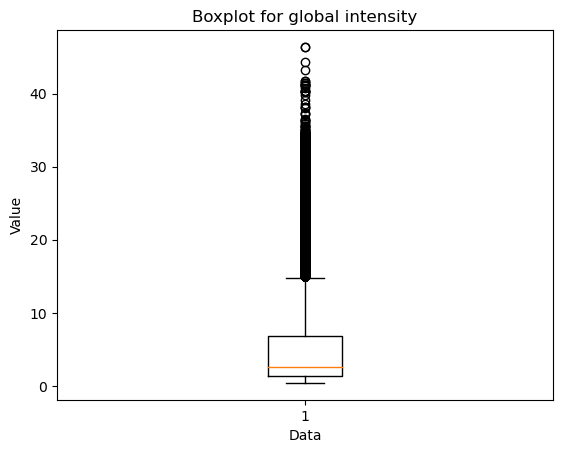

In [20]:
plt.boxplot(df['Global_intensity'].astype('float'))

# Add labels and title
plt.xlabel('Data')
plt.ylabel('Value')
plt.title('Boxplot for global intensity')

# Show the plot
plt.show()

TIME SERIES PLOTS 

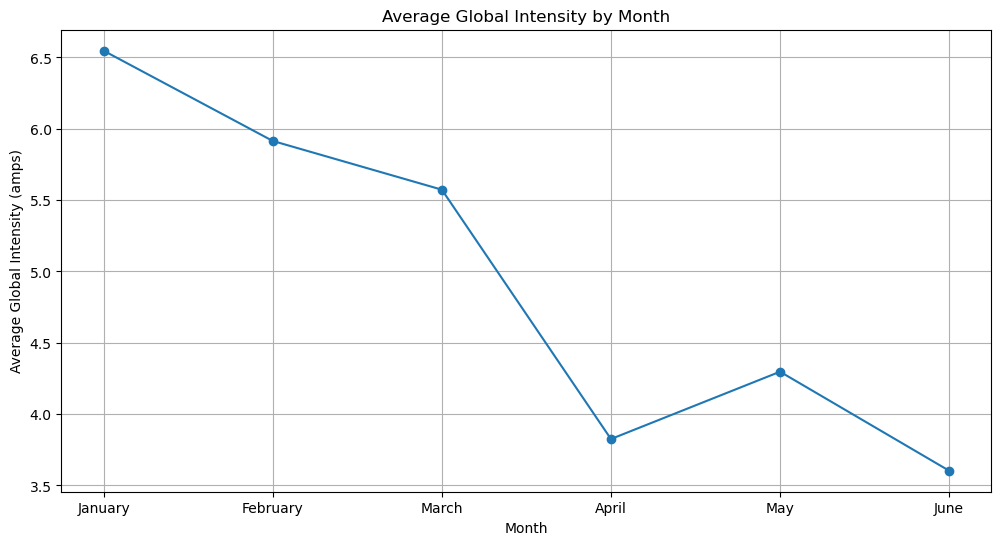

In [21]:
df_copy = df.copy()
# Making a graph for visualizing Global Intensity for every month
df_copy['Date'] = pd.to_datetime(df_copy['Date'], format='%d/%m/%Y')
df_copy['Month'] = df_copy['Date'].dt.month

df_copy['Global_intensity'] = pd.to_numeric(
    df_copy['Global_intensity'], errors='coerce')
monthly_avg_intensity = df_copy.groupby('Month')['Global_intensity'].mean()

month_names = ['January', 'February', 'March', 'April', 'May', 'June']

plt.figure(figsize=(12, 6))
plt.plot(month_names, monthly_avg_intensity, marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Average Global Intensity (amps)')
plt.title('Average Global Intensity by Month')
plt.grid(True)
plt.show()


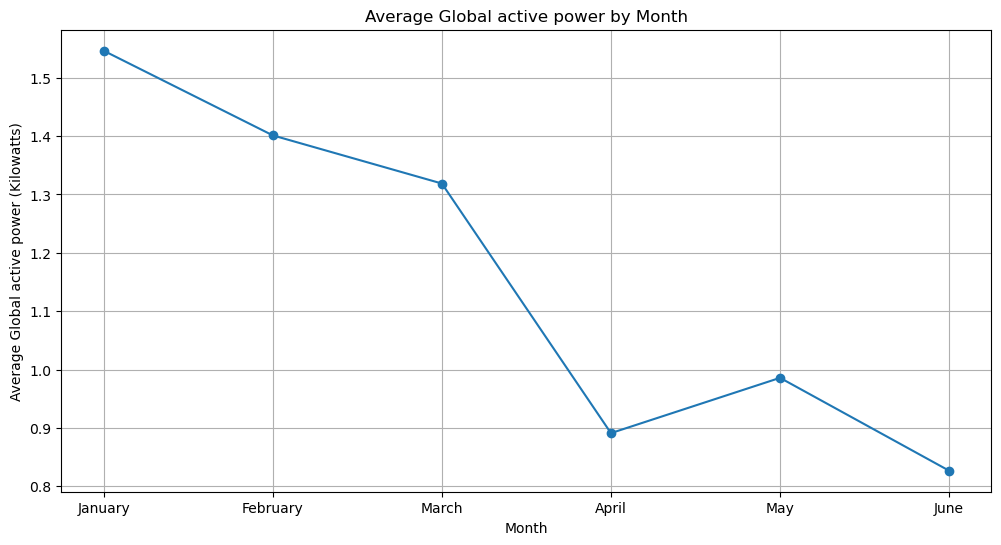

In [22]:
# Making a graph for visualising Global Intensity for every month
df_copy['Date'] = pd.to_datetime(df_copy['Date'], format='%d/%m/%Y')
df_copy['Month'] = df_copy['Date'].dt.month

df_copy['Global_active_power'] = pd.to_numeric(
    df_copy['Global_active_power'], errors='coerce')
monthly_avg_intensity = df_copy.groupby('Month')['Global_active_power'].mean()

month_names = ['January', 'February', 'March', 'April', 'May', 'June']

plt.figure(figsize=(12, 6))
plt.plot(month_names, monthly_avg_intensity, marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Average Global active power (Kilowatts)')
plt.title('Average Global active power by Month')
plt.grid(True)
plt.show()


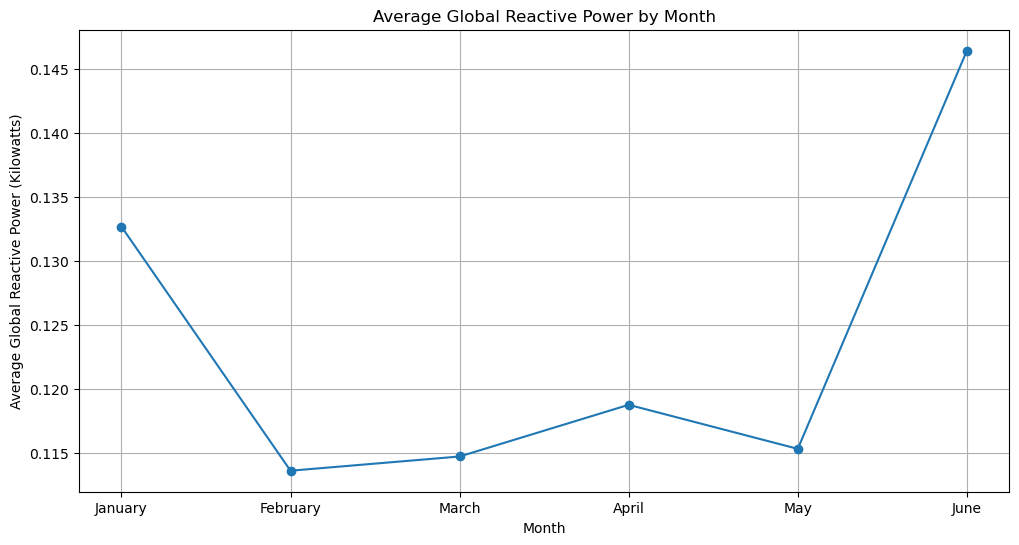

In [23]:
# Making a graph for visualising Global Reactive Power for every month
df_copy['Date'] = pd.to_datetime(df_copy['Date'], format='%d/%m/%Y')
df_copy['Month'] = df_copy['Date'].dt.month

df_copy['Global_reactive_power'] = pd.to_numeric(
    df_copy['Global_reactive_power'], errors='coerce')
monthly_avg_reactive_power = df_copy.groupby(
    'Month')['Global_reactive_power'].mean()

month_names = ['January', 'February', 'March', 'April', 'May', 'June']

plt.figure(figsize=(12, 6))
plt.plot(month_names, monthly_avg_reactive_power, marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Average Global Reactive Power (Kilowatts)')
plt.title('Average Global Reactive Power by Month')
plt.grid(True)
plt.show()


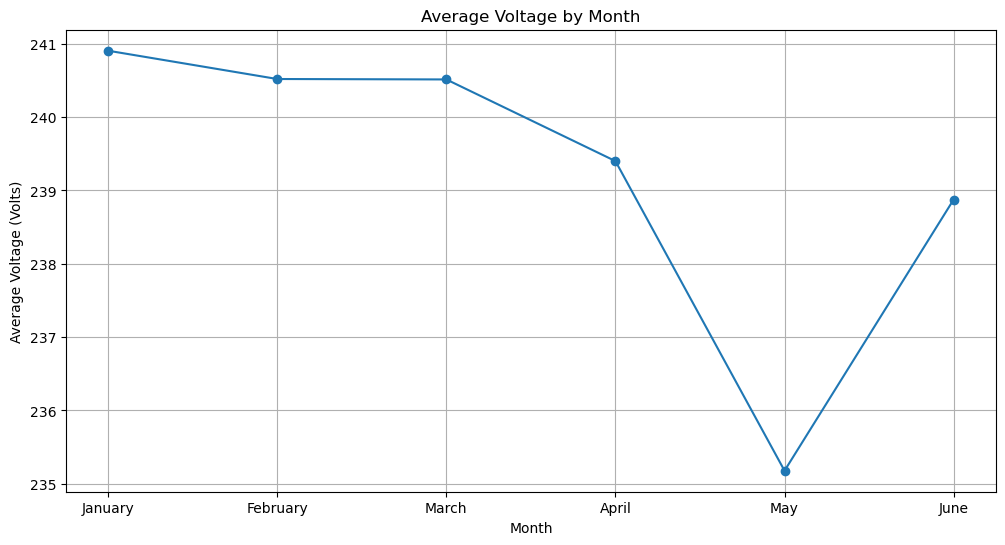

In [24]:
# Making a graph for visualising Average Voltage for every month
df_copy['Date'] = pd.to_datetime(df_copy['Date'], format='%d/%m/%Y')
df_copy['Month'] = df_copy['Date'].dt.month

df_copy['Voltage'] = pd.to_numeric(df_copy['Voltage'], errors='coerce')
monthly_avg_voltage = df_copy.groupby('Month')['Voltage'].mean()

month_names = ['January', 'February', 'March', 'April', 'May', 'June']

plt.figure(figsize=(12, 6))
plt.plot(month_names, monthly_avg_voltage, marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Average Voltage (Volts)')
plt.title('Average Voltage by Month')
plt.grid(True)
plt.show()


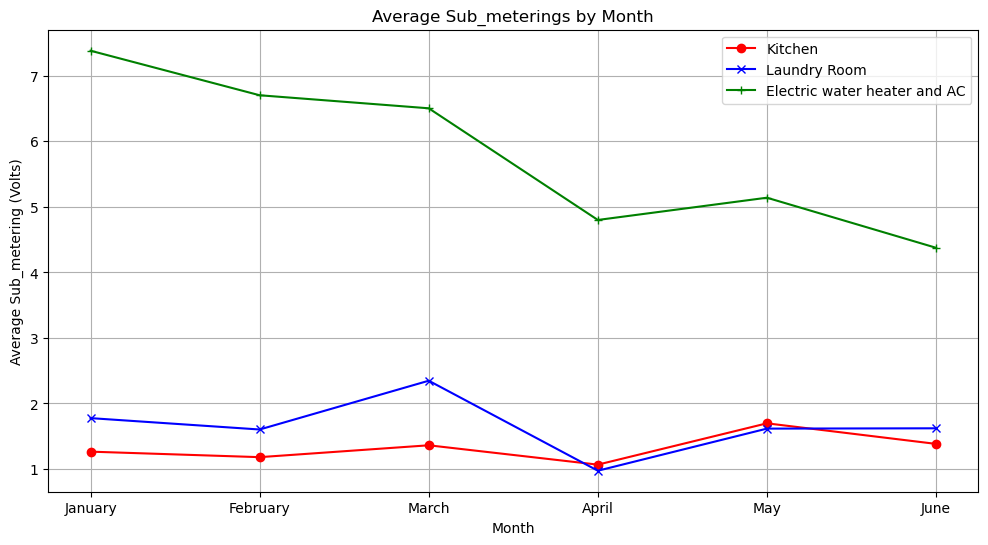

In [25]:
# Making a graph for visualising Global Intensity for every month
df_copy['Date'] = pd.to_datetime(df_copy['Date'], format='%d/%m/%Y')
df_copy['Month'] = df_copy['Date'].dt.month

df_copy['Sub_metering_1'] = pd.to_numeric(
    df_copy['Sub_metering_1'], errors='coerce')
df_copy['Sub_metering_2'] = pd.to_numeric(
    df_copy['Sub_metering_2'], errors='coerce')
df_copy['Sub_metering_3'] = pd.to_numeric(
    df_copy['Sub_metering_3'], errors='coerce')
monthly_avg_intensity_1 = df_copy.groupby('Month')['Sub_metering_1'].mean()
monthly_avg_intensity_2 = df_copy.groupby('Month')['Sub_metering_2'].mean()
monthly_avg_intensity_3 = df_copy.groupby('Month')['Sub_metering_3'].mean()

month_names = ['January', 'February', 'March', 'April', 'May', 'June']

plt.figure(figsize=(12, 6))
plt.plot(month_names, monthly_avg_intensity_1,
         marker='o', color='red', linestyle='-', label='Kitchen')
plt.plot(month_names, monthly_avg_intensity_2,
         marker='x', color='blue', linestyle='-', label = 'Laundry Room')
plt.plot(month_names, monthly_avg_intensity_3,
         marker='+', color='green', linestyle='-', label = 'Electric water heater and AC')
plt.xlabel('Month')
plt.ylabel('Average Sub_metering (Volts)')
plt.title('Average Sub_meterings by Month')
plt.legend()
plt.grid(True)
plt.show()


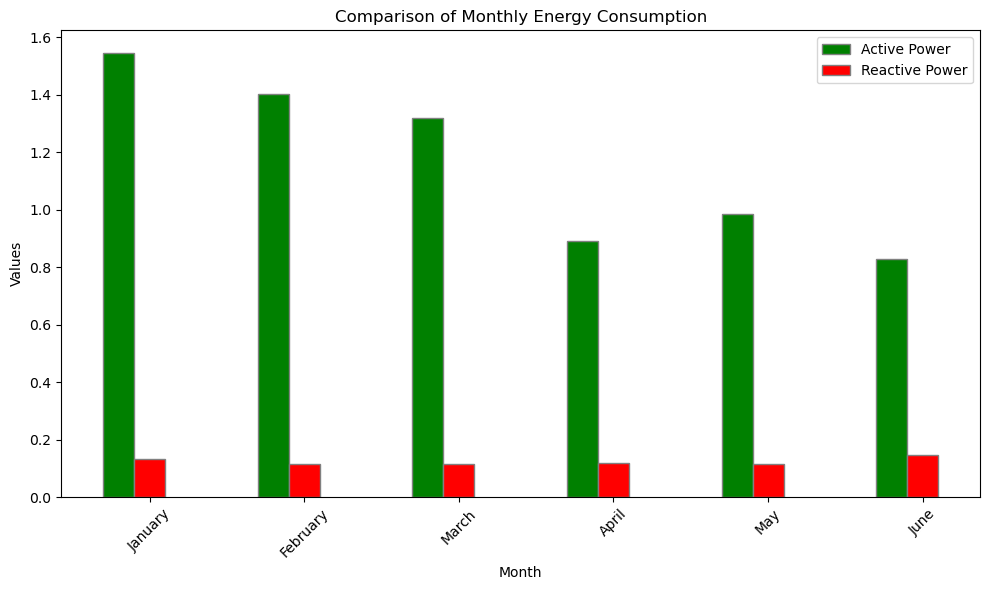

In [26]:
df_copy['Month'] = df_copy['Date'].dt.to_period('M')

# Filter DataFrame to include only data from January to June
df_filtered = df_copy[df_copy['Month'].dt.month <= 6]

#monthly averages
monthly_avg = df_filtered.groupby('Month').agg({
    'Global_active_power': 'mean',
    'Global_reactive_power': 'mean'
    # 'Global_intensity': 'mean'
}).reset_index()

plt.figure(figsize=(10, 6))

months = monthly_avg['Month']

active_power = monthly_avg['Global_active_power']
reactive_power = monthly_avg['Global_reactive_power']
# global_intensity = monthly_avg['Global_intensity']

bar_width = 0.2

r1 = range(len(months))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

plt.bar(r1, active_power, color='g', width=bar_width,edgecolor='grey', label='Active Power')
plt.bar(r2, reactive_power, color='r', width=bar_width,edgecolor='grey', label='Reactive Power')
# plt.bar(r3, global_intensity, color='purple', width=bar_width,edgecolor='grey', label='Global Intensity')

plt.xlabel('Month')
plt.xticks(r2, months.dt.strftime('%B'), rotation=45)
plt.ylabel('Values')
plt.title('Comparison of Monthly Energy Consumption')
plt.legend()

plt.tight_layout()
plt.show()

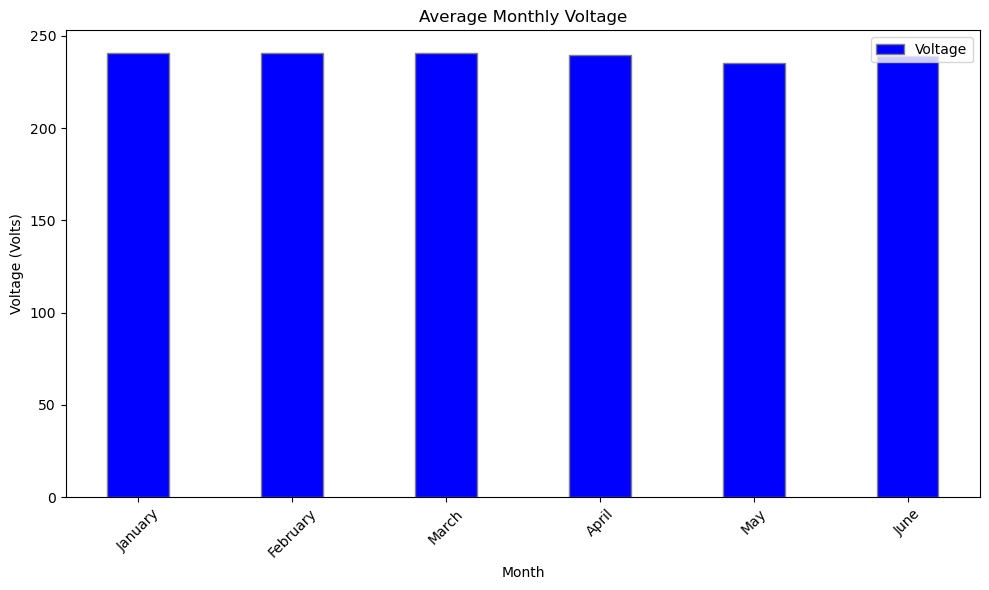

In [27]:
df_copy['Month'] = df_copy['Date'].dt.to_period('M')

# monthly average voltage
monthly_avg_voltage = df_copy.groupby('Month')['Voltage'].mean().reset_index()

plt.figure(figsize=(10, 6))

months = monthly_avg_voltage['Month']

voltage = monthly_avg_voltage['Voltage']

bar_width = 0.4

r1 = range(len(months))

plt.bar(r1, voltage, color='b', width=bar_width,edgecolor='grey', label='Voltage')

plt.xlabel('Month')
plt.xticks(r1, months.dt.strftime('%B'), rotation=45)
plt.ylabel('Voltage (Volts)')
plt.title('Average Monthly Voltage')
plt.legend()

plt.tight_layout()
plt.show()


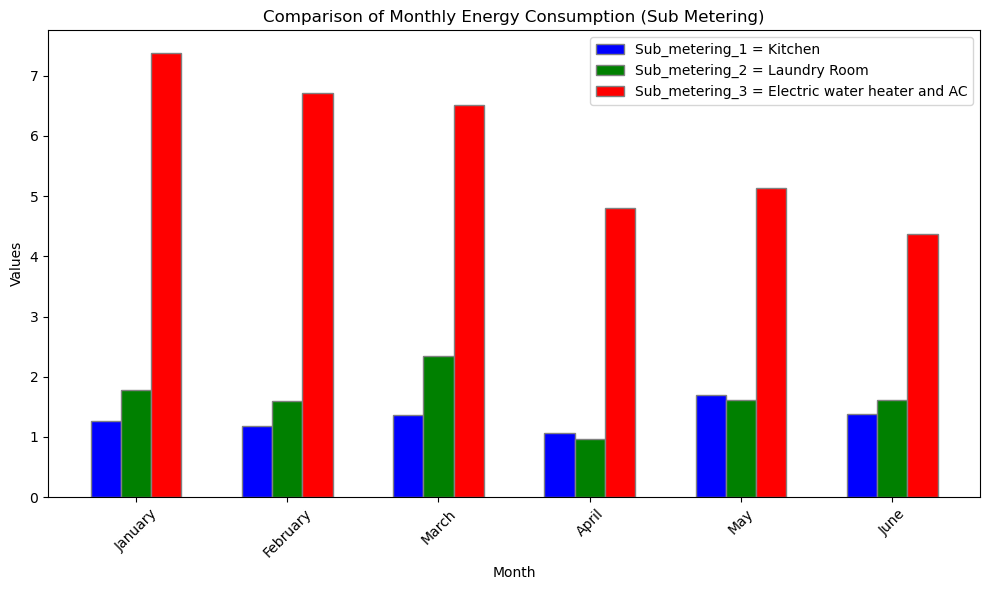

In [28]:
df_copy['Month'] = df_copy['Date'].dt.to_period('M')

# monthly averages
monthly_avg = df_copy.groupby('Month').agg({
    'Sub_metering_1': 'mean',
    'Sub_metering_2': 'mean',
    'Sub_metering_3': 'mean'
}).reset_index()

plt.figure(figsize=(10, 6))

months = monthly_avg['Month']

sub_metering_1 = monthly_avg['Sub_metering_1']
sub_metering_2 = monthly_avg['Sub_metering_2']
sub_metering_3 = monthly_avg['Sub_metering_3']

bar_width = 0.2

r1 = range(len(months))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

plt.bar(r1, sub_metering_1, color='b', width=bar_width,edgecolor='grey', label='Sub_metering_1 = Kitchen')
plt.bar(r2, sub_metering_2, color='g', width=bar_width,edgecolor='grey', label='Sub_metering_2 = Laundry Room')
plt.bar(r3, sub_metering_3, color='r', width=bar_width,edgecolor='grey', label='Sub_metering_3 = Electric water heater and AC')

plt.xlabel('Month')
plt.xticks(r2, months.dt.strftime('%B'), rotation=45)
plt.ylabel('Values')
plt.title('Comparison of Monthly Energy Consumption (Sub Metering)')
plt.legend()

plt.tight_layout()
plt.show()


Adding new feature Is_Weekend as binary indicators for weekends/weekdays

In [29]:

df_copy['Date'] = pd.to_datetime(df_copy['Date'], format='%d/%m/%y')

df_copy['Is_weekend'] = (df_copy['Date'].dt.dayofweek >= 5).astype(int)


In [30]:
df_copy.head(1000000)

,index,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Month,Is_weekend
0,0,2007-01-01,0 days 00:00:00,2.580,0.136,241.97,10.6,0,0,0.0,2007-01,0
1,1,2007-01-01,0 days 00:01:00,2.552,0.100,241.75,10.4,0,0,0.0,2007-01,0
2,2,2007-01-01,0 days 00:02:00,2.550,0.100,241.64,10.4,0,0,0.0,2007-01,0
3,3,2007-01-01,0 days 00:03:00,2.550,0.100,241.71,10.4,0,0,0.0,2007-01,0
4,4,2007-01-01,0 days 00:04:00,2.554,0.100,241.98,10.4,0,0,0.0,2007-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...
260635,260635,2007-06-30,0 days 23:55:00,2.880,0.360,239.01,12.0,0,0,18.0,2007-06,1
260636,260636,2007-06-30,0 days 23:56:00,2.892,0.358,238.86,12.2,0,0,17.0,2007-06,1
260637,260637,2007-06-30,0 days 23:57:00,2.882,0.280,239.05,12.0,0,0,18.0,2007-06,1
260638,260638,2007-06-30,0 days 23:58:00,2.660,0.290,238.98,11.2,0,0,18.0,2007-06,1


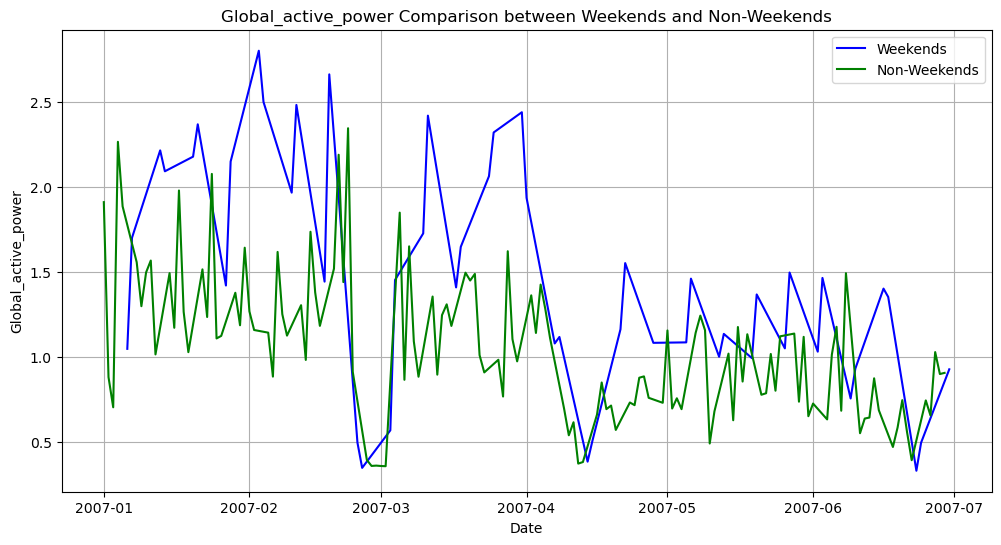

In [31]:
# Voltage Comparison between Weekends and Non-Weekends
df_copy['Date'] = pd.to_datetime(df_copy['Date'])

daily_avg = df_copy.groupby(['Date', 'Is_weekend'])['Global_active_power'].mean().reset_index()

weekend_data = daily_avg[daily_avg['Is_weekend'] == 1]
non_weekend_data = daily_avg[daily_avg['Is_weekend'] == 0]

plt.figure(figsize=(12, 6))

plt.plot(weekend_data['Date'], weekend_data['Global_active_power'],label='Weekends', color='blue')
plt.plot(non_weekend_data['Date'], non_weekend_data['Global_active_power'],label='Non-Weekends', color='green')

plt.xlabel('Date')
plt.ylabel('Global_active_power')
plt.title('Global_active_power Comparison between Weekends and Non-Weekends')
plt.legend()
plt.grid(True)
plt.show()


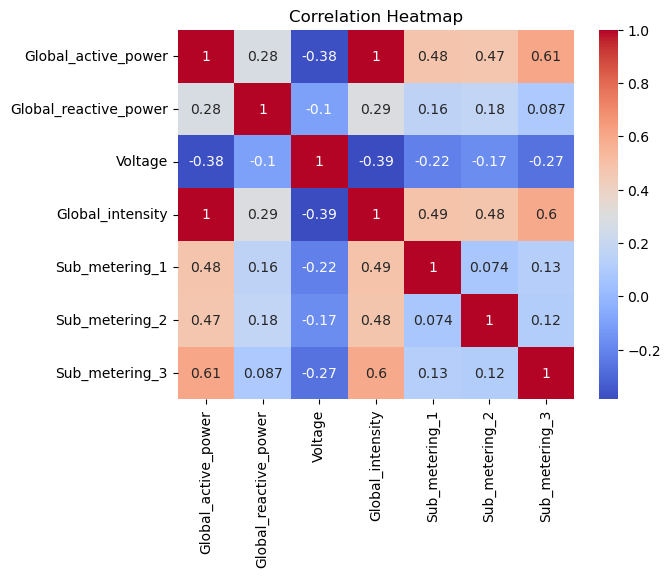

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

columns_to_exclude = ['index', 'Date', 'Time', 'Month', 'Is_weekend']

df_selected = df_copy.drop(columns=columns_to_exclude)

correlation_matrix = df_selected.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Regression Models

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

labelEncoder=LabelEncoder()
df_copy['Time']=labelEncoder.fit_transform(df_copy['Time'])

df_copy['Month'] = df_copy['Month'].astype('category') 

# Assigning numerical values and storing it in another columns 
df_copy['Month_new'] = df_copy['Month'].cat.codes 

# Create an instance of One-hot-encoder 
enc = OneHotEncoder() 
enc_data = pd.DataFrame(enc.fit_transform( df_copy[['Month_new']]).toarray()) 

# Merge with main 
New_df = df_copy.join(enc_data) 

features=['Time',	'Voltage',	'Sub_metering_1',	'Sub_metering_2',	'Sub_metering_3',	'Month_new',	'Is_weekend','Global_reactive_power',	'Global_intensity']
target=['Global_active_power']

x,y=df_copy[features],df_copy[target]
Xtrain, Xtest, ytrain, ytest = train_test_split(df_copy[features], df_copy[target],random_state=1, test_size=0.2, shuffle=True)

In [34]:
df_copy

,index,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Month,Is_weekend,Month_new
0,0,2007-01-01,0,2.580,0.136,241.97,10.6,0,0,0.0,2007-01,0,0
1,1,2007-01-01,1,2.552,0.100,241.75,10.4,0,0,0.0,2007-01,0,0
2,2,2007-01-01,2,2.550,0.100,241.64,10.4,0,0,0.0,2007-01,0,0
3,3,2007-01-01,3,2.550,0.100,241.71,10.4,0,0,0.0,2007-01,0,0
4,4,2007-01-01,4,2.554,0.100,241.98,10.4,0,0,0.0,2007-01,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
260635,260635,2007-06-30,1435,2.880,0.360,239.01,12.0,0,0,18.0,2007-06,1,5
260636,260636,2007-06-30,1436,2.892,0.358,238.86,12.2,0,0,17.0,2007-06,1,5
260637,260637,2007-06-30,1437,2.882,0.280,239.05,12.0,0,0,18.0,2007-06,1,5
260638,260638,2007-06-30,1438,2.660,0.290,238.98,11.2,0,0,18.0,2007-06,1,5


In [35]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(Xtrain,ytrain)

LinearRegression()

In [36]:
y_pred=regressor.predict(Xtest)


In [37]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

mse = mean_squared_error(ytest, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(ytest, y_pred)

print("MSE:" ,mse)
print("RMSE:" ,rmse)
print("R2 Score: ",r2)


MSE: 0.0020415680445497603
RMSE: 0.045183714373098635
R2 Score:  0.9985408344819497


In [38]:
def line_plot(ytest,y_pred,title):
    # Plotting observed and predicted global_active power

    # Creating figure and setting boundaries
    # Only for the first 100 values
    plt.rcParams['figure.figsize']=(20,12)
    x_ax=range(len(ytest[0:100]))
    plt.plot(x_ax,ytest[0:100],label='Observed',color = 'k',linestyle='-')
    plt.plot(x_ax,y_pred[0:100],label = 'Predicted', color = 'k' , linestyle = '--')
    # Continous line rep Observed values
    # Broken lines rep. predicted values
    plt.ylabel('Global_active_power(kw)')
    plt.xlabel('Testing data(First 100)')
    plt.title(title)
    plt.legend()
    plt.show()

def scatter(ytest,y_pred,title):
    plt.scatter(ytest,y_pred, alpha=0.5)
    plt.plot([y.min(),y.max()],[y.min(),y.max()],color='red')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(title) 
    plt.show()
    
def residue(ytest,y_pred, title):
    # Plotting the residuals
    plt.scatter(y_pred,ytest-y_pred,alpha=0.5)
    plt.title(title)
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.show()

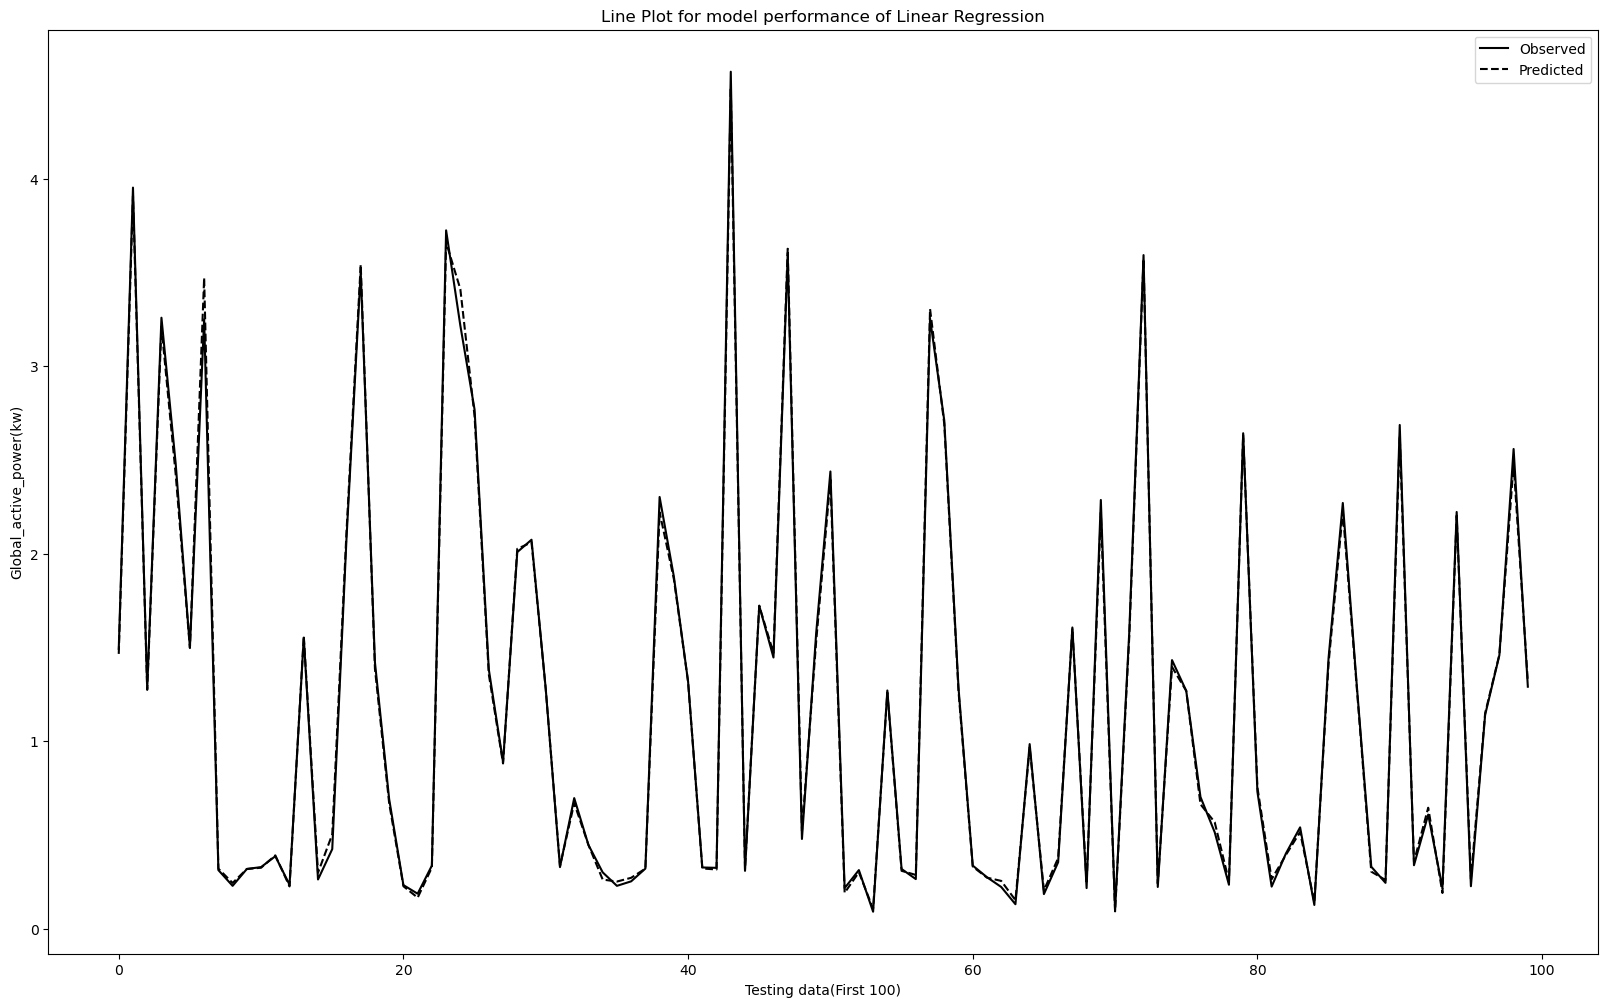

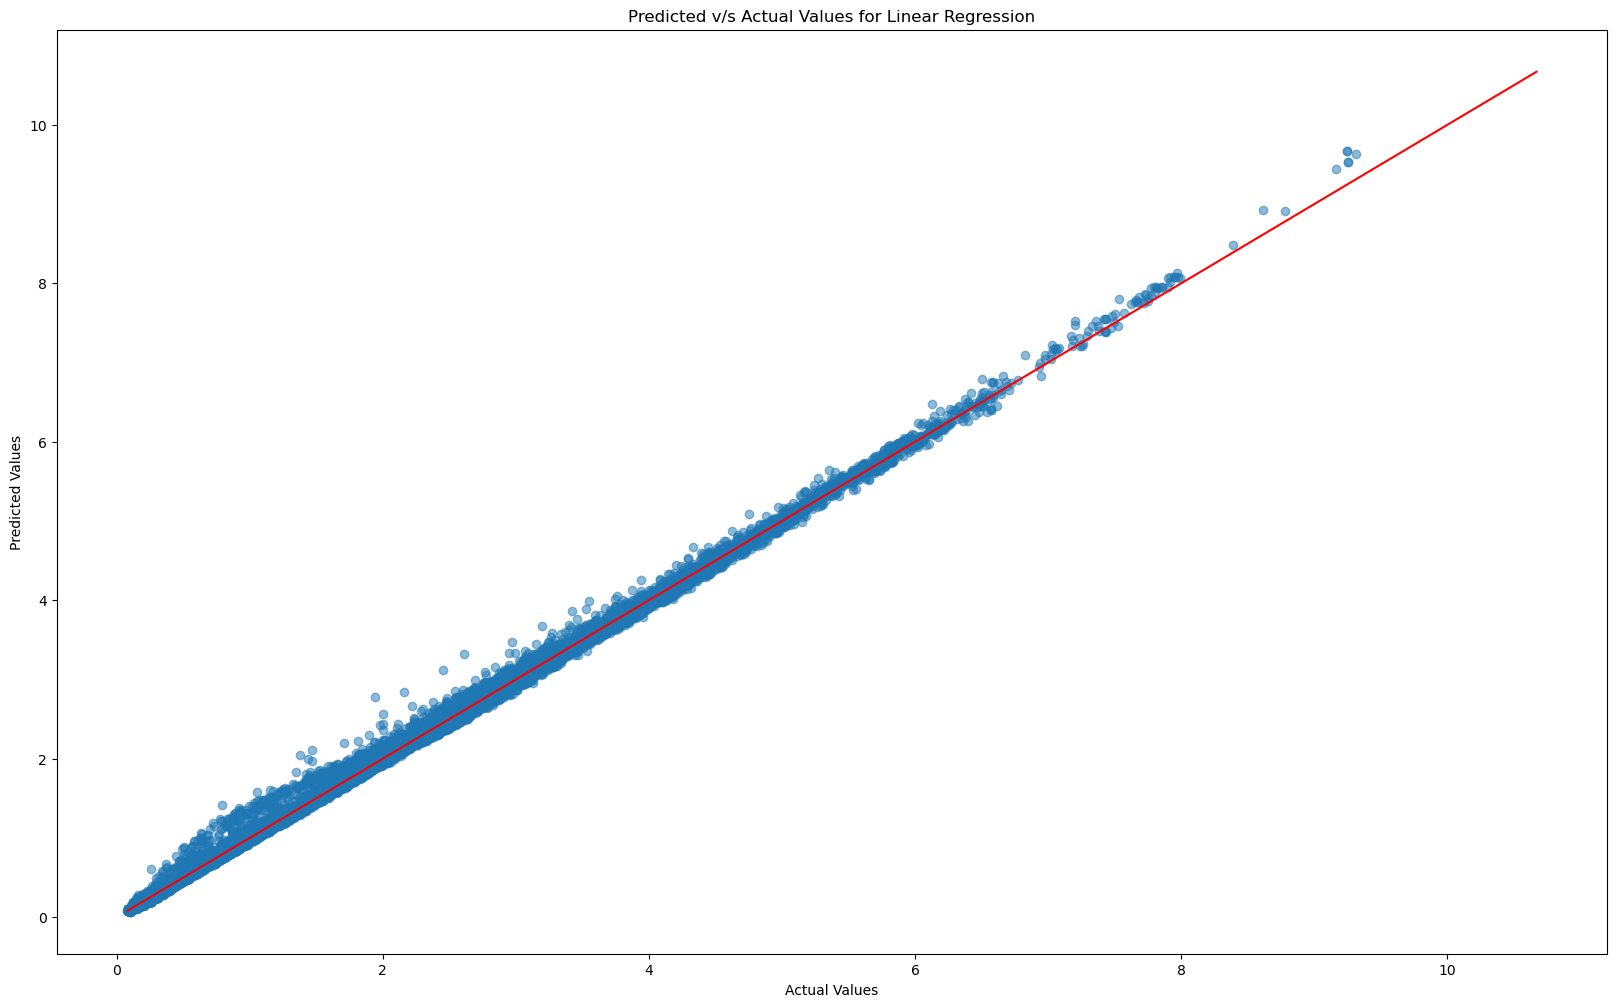

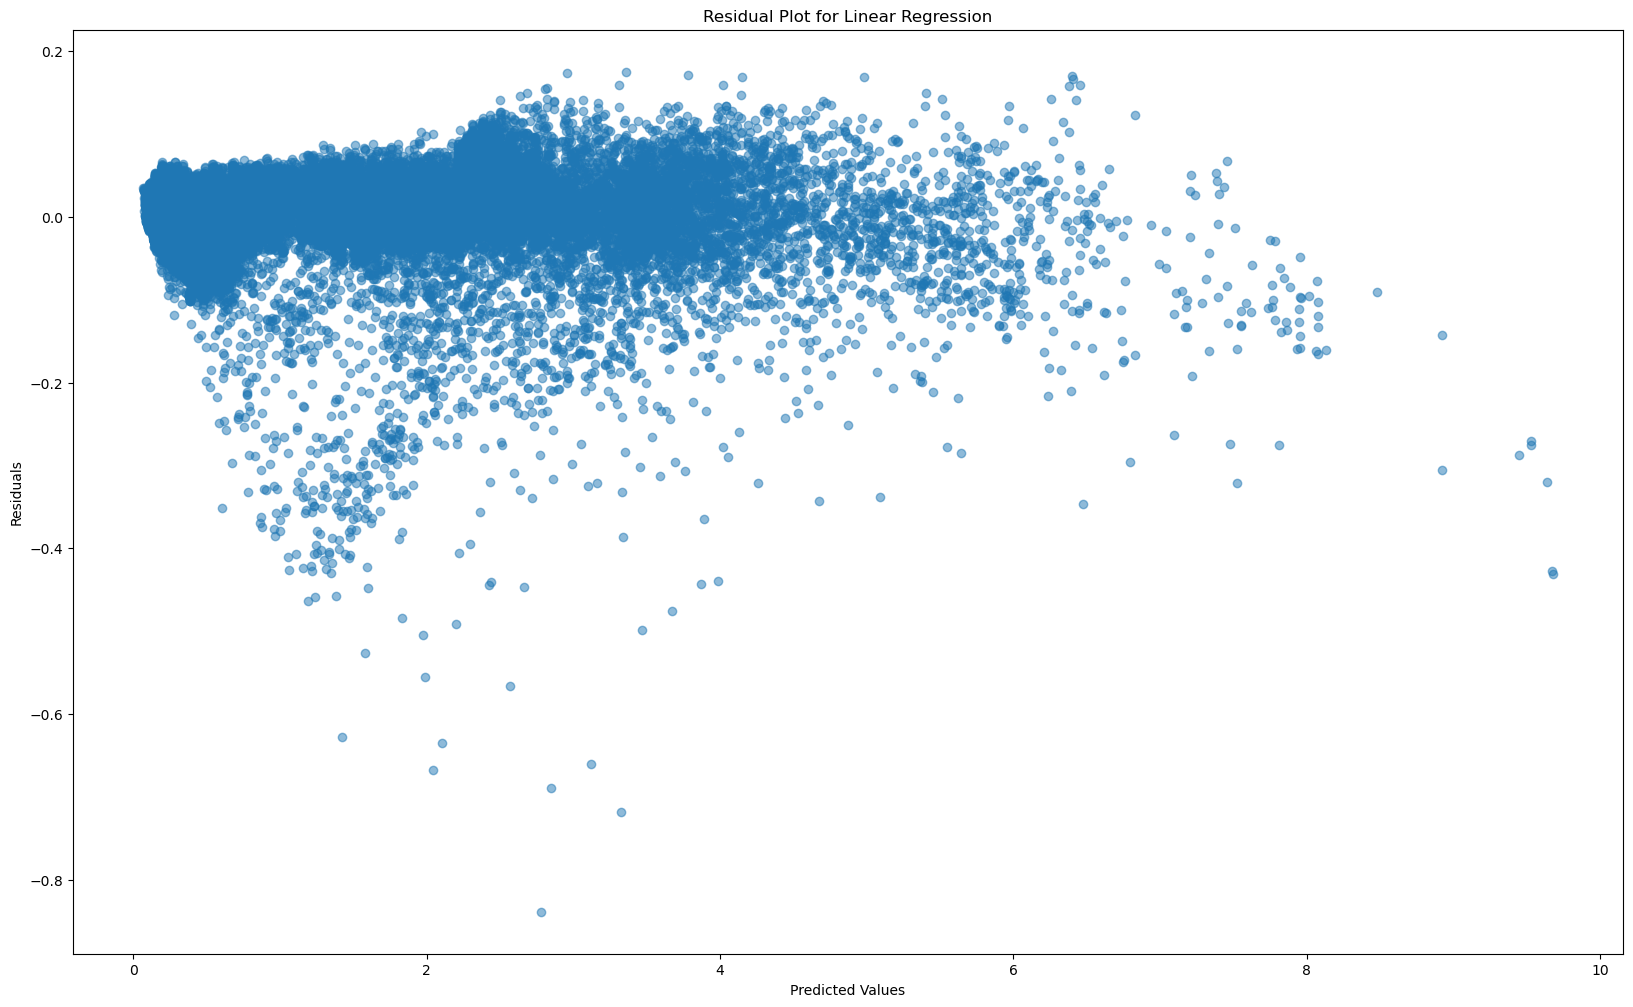

In [39]:
line_plot(ytest,y_pred, 'Line Plot for model performance of Linear Regression')
scatter(ytest,y_pred,'Predicted v/s Actual Values for Linear Regression')
residue(ytest,y_pred, 'Residual Plot for Linear Regression')

In [40]:
# SGD Regression
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

In [41]:
x = scale(x)
y = scale(y)
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=.2,random_state=1,shuffle=True)

sgdr = SGDRegressor(alpha=0.0001, epsilon=0.01, eta0=0.1,penalty='elasticnet')

ytrain=ytrain.ravel()
ytest=ytest.ravel()
sgdr.fit(xtrain, ytrain)

score = sgdr.score(xtrain, ytrain)
print("R-squared:", score)



R-squared: 0.998513635786526


In [42]:
ypred = sgdr.predict(xtest)

# mse = mean_squared_error(ytest, ypred)
# print("MSE: ", mse)
# score = sgdr.score(xtest, ytest)
# print("R-squared:", score)

mse = mean_squared_error(ytest, ypred)
rmse = np.sqrt(mse)
r2 = r2_score(ytest, ypred)

print("MSE:" ,mse)
print("RMSE:" ,rmse)
print("R2 Score: ",r2)

MSE: 0.00149999079533306
RMSE: 0.038729714630152644
R2 Score:  0.9985025950948566


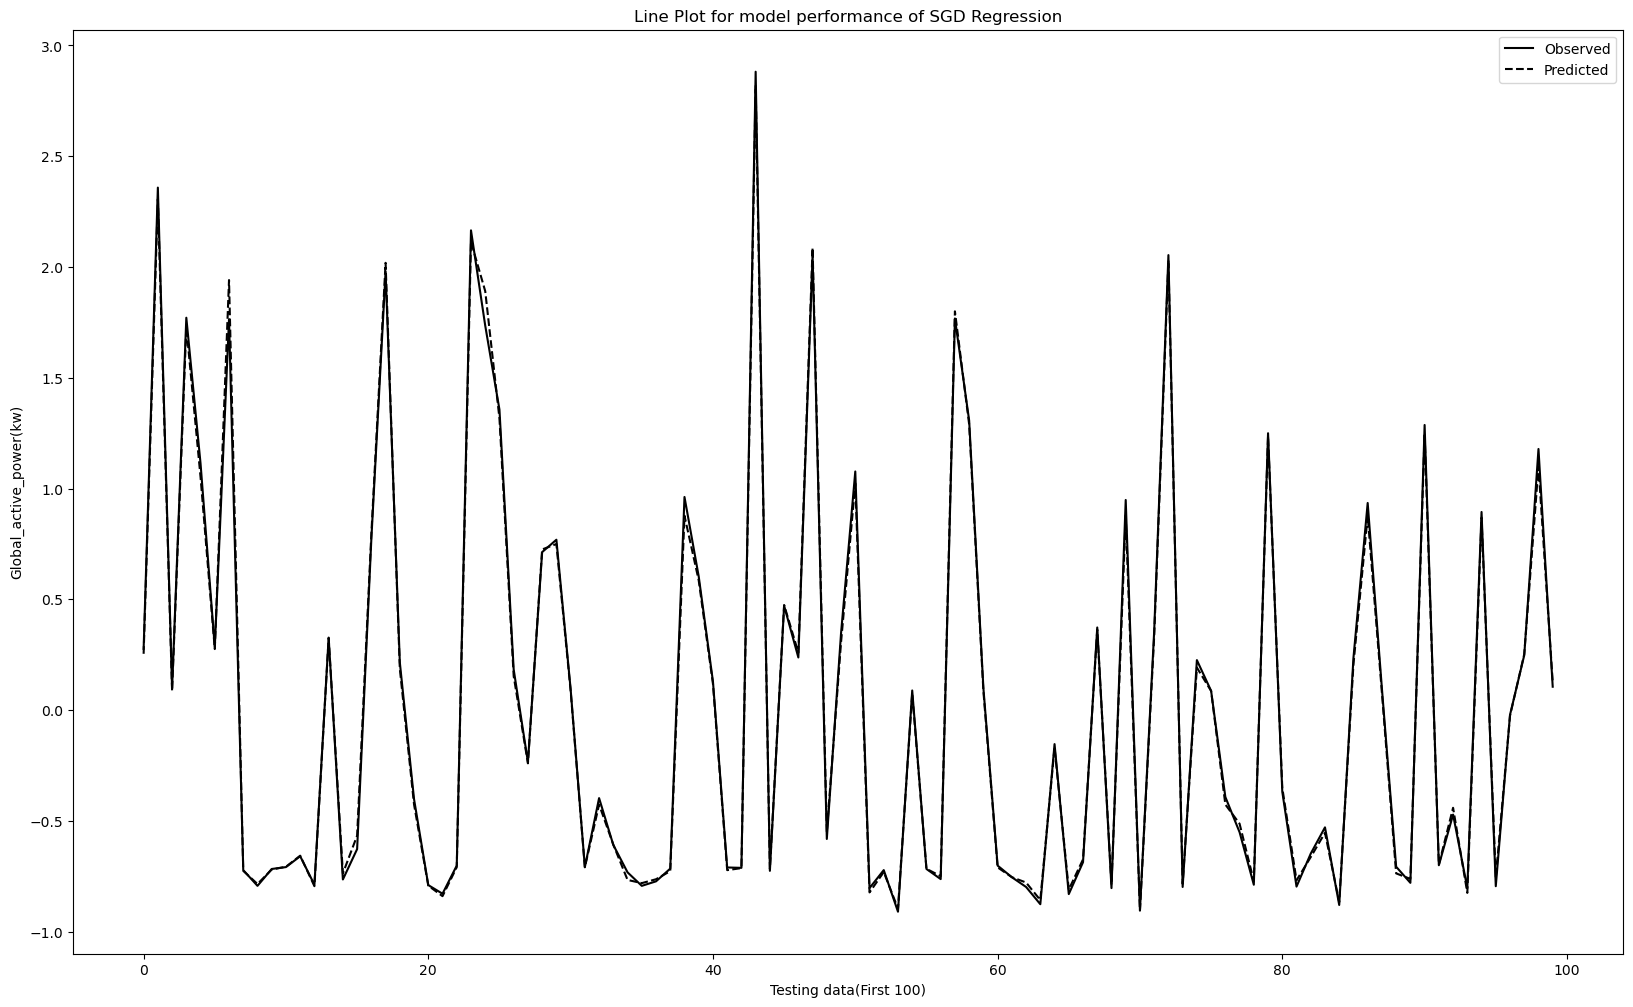

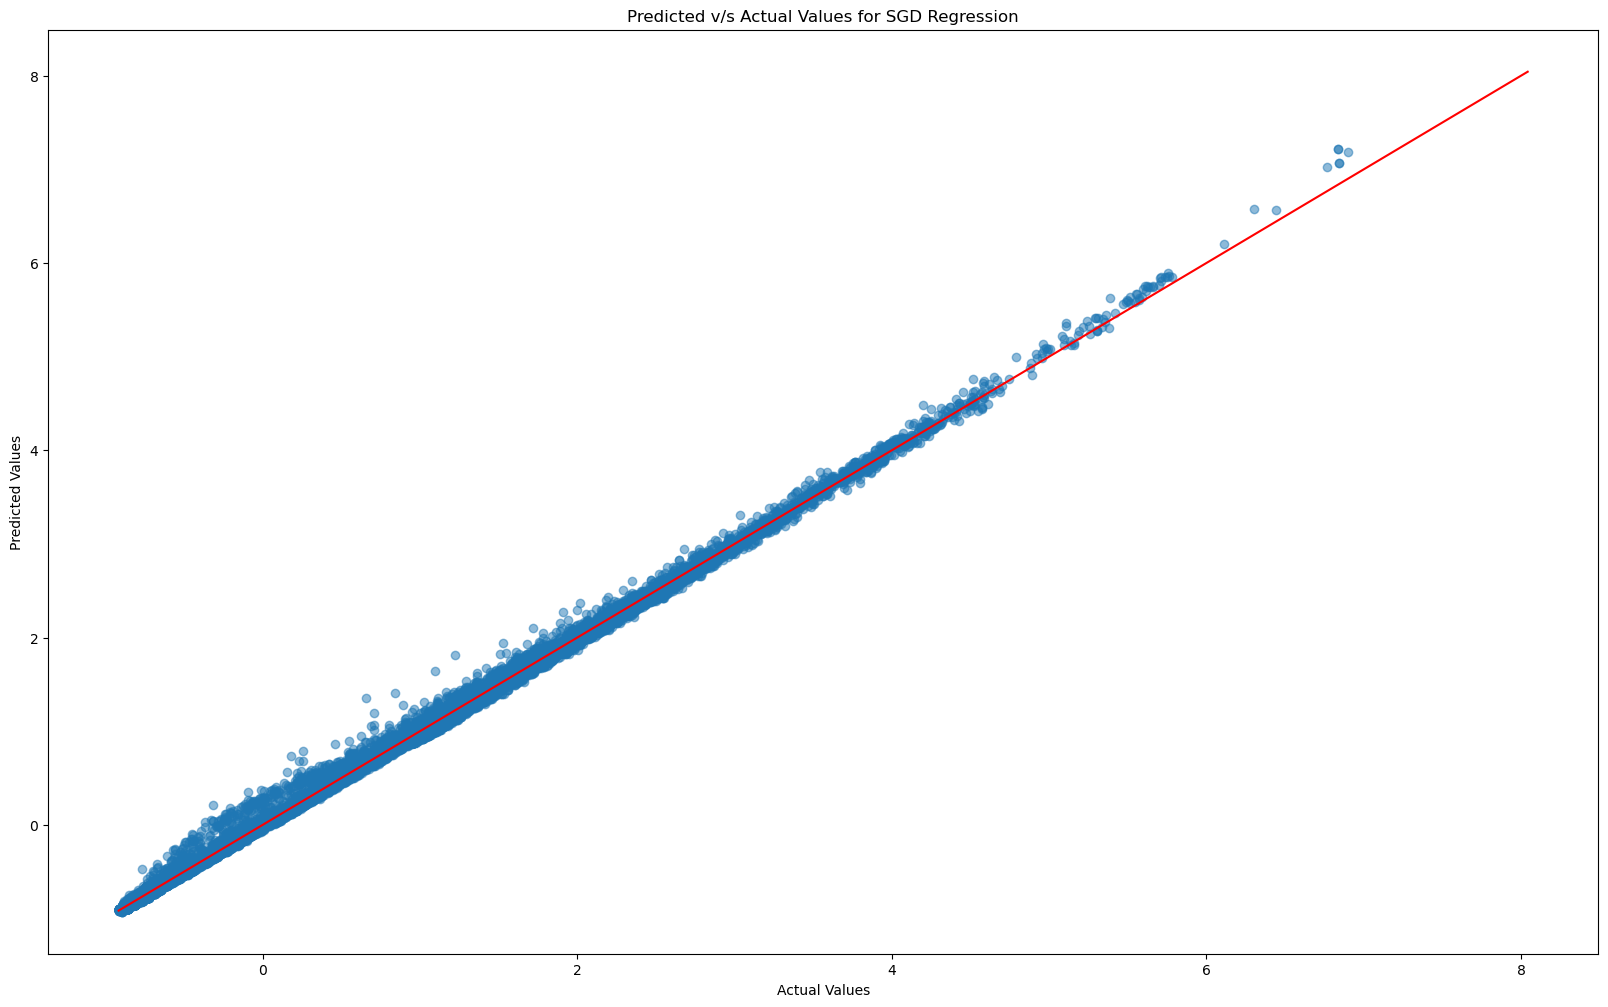

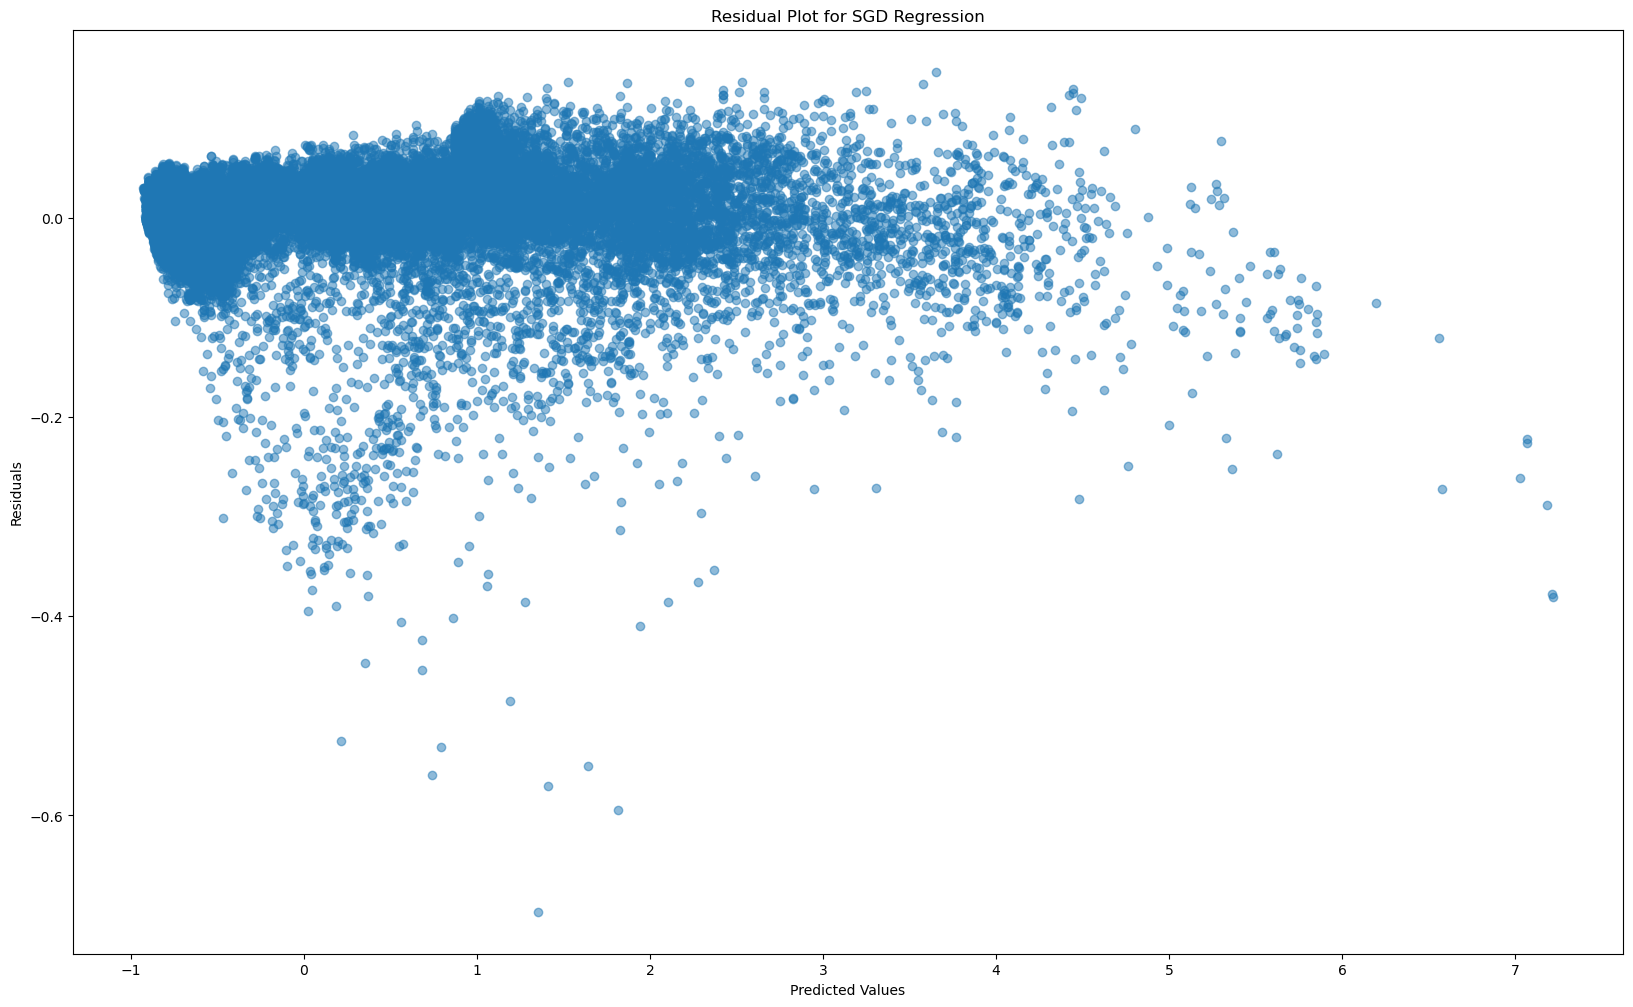

In [43]:

line_plot(ytest,ypred, 'Line Plot for model performance of SGD Regression')
scatter(ytest,ypred,'Predicted v/s Actual Values for SGD Regression')
residue(ytest,ypred, 'Residual Plot for SGD Regression')

In [44]:
from numpy import arange
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold
# Ridge Regression
Xtrain, Xtest, ytrain, ytest = train_test_split(df_copy[features], df_copy[target],random_state=1, test_size=0.2, shuffle=True)

#define cross-validation method to evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
model = RidgeCV(alphas=arange(0, 1, 0.01), cv=cv, scoring='neg_mean_absolute_error')

#fit model
model.fit(Xtrain, ytrain)

#display lambda that produced the lowest test MSE
print(model.alpha_)

0.0


In [45]:
predictions = model.predict(Xtest)
r2_score(ytest,predictions)

mse = mean_squared_error(ytest, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(ytest, predictions)

print("MSE:" ,mse)
print("RMSE:" ,rmse)
print("R2 Score: ",r2)

MSE: 0.002041568044549761
RMSE: 0.04518371437309865
R2 Score:  0.9985408344819497


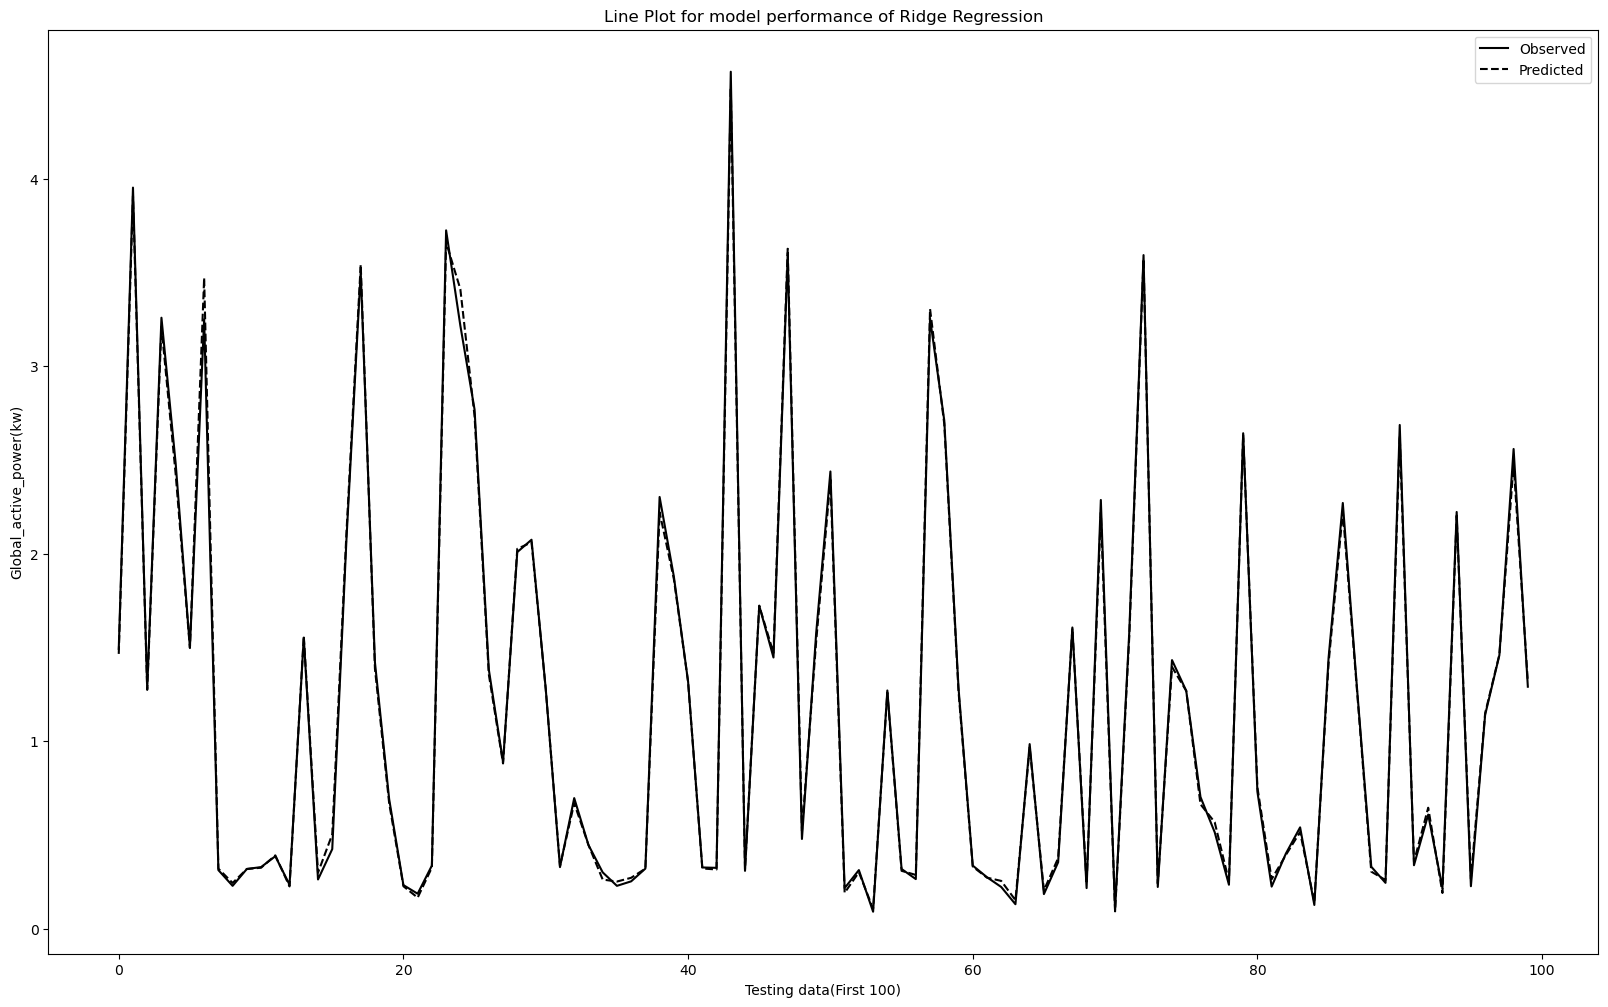

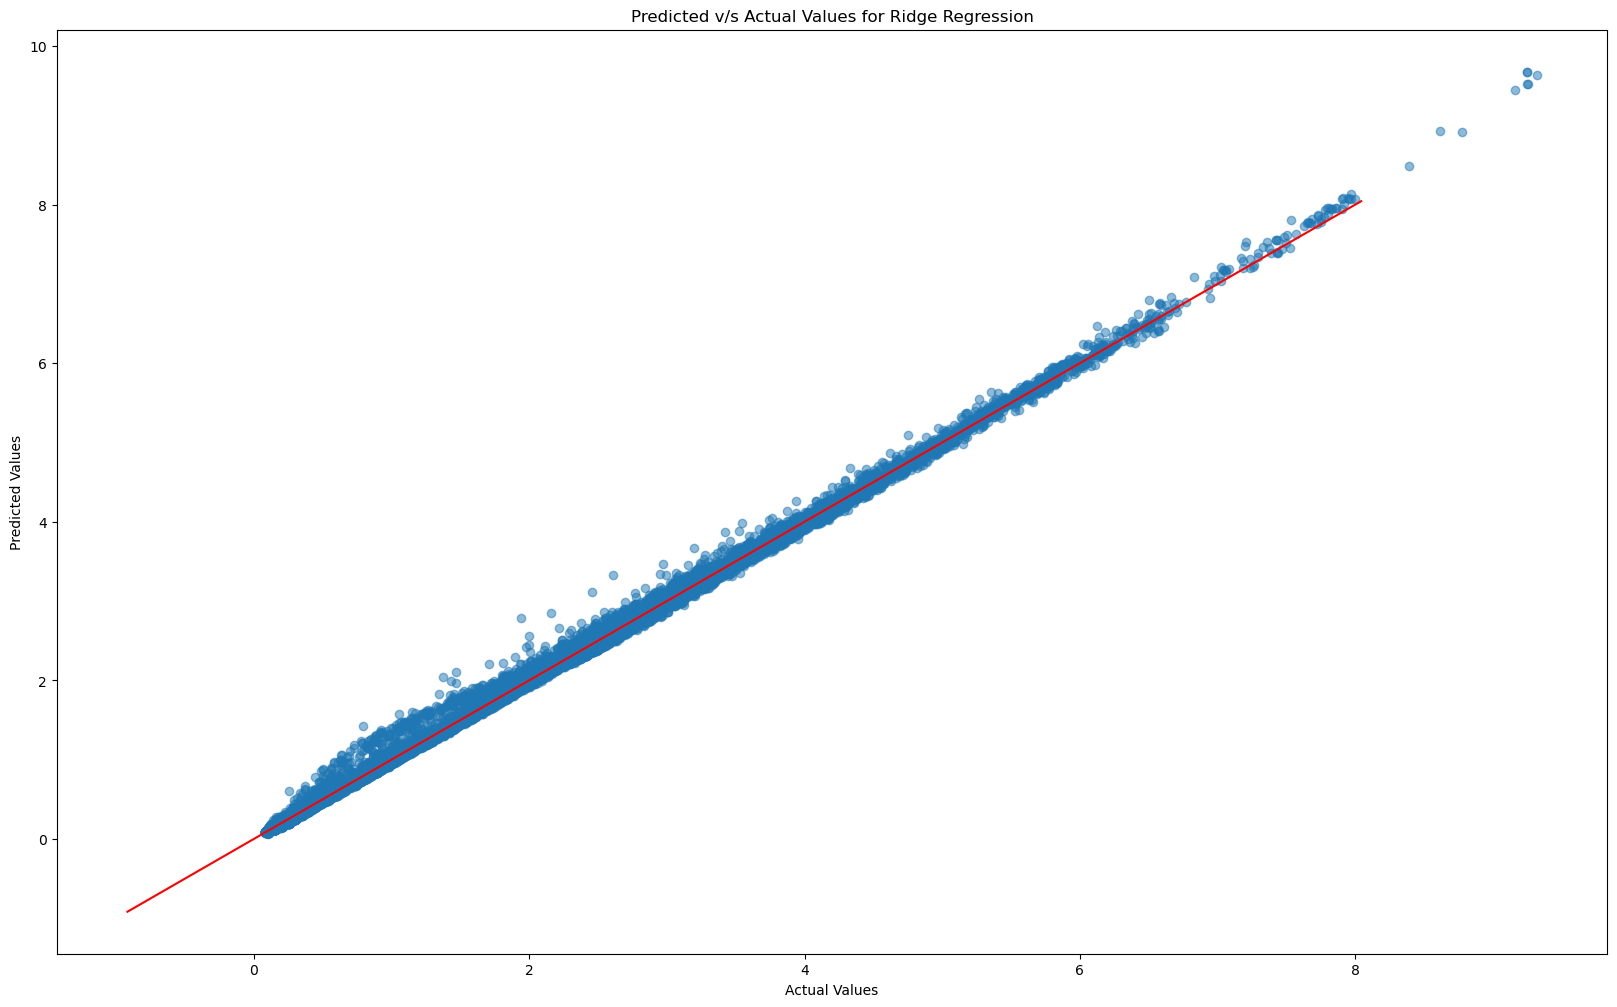

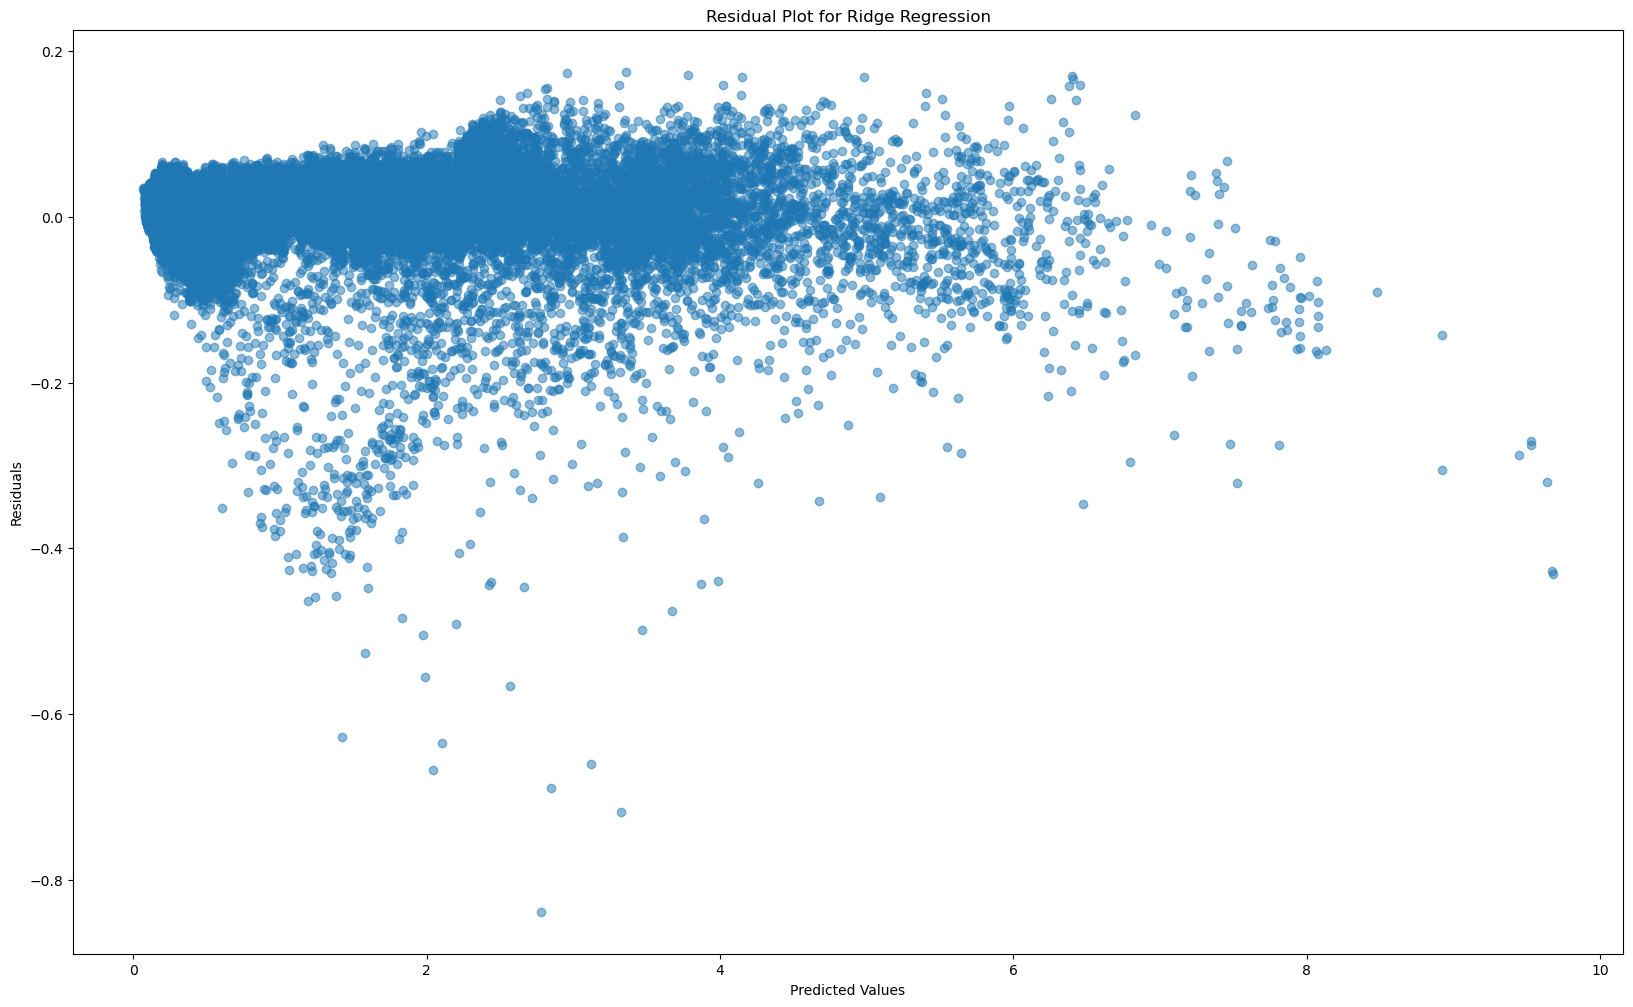

In [46]:
line_plot(ytest,predictions, 'Line Plot for model performance of Ridge Regression')
scatter(ytest,predictions,'Predicted v/s Actual Values for Ridge Regression')
residue(ytest,predictions, 'Residual Plot for Ridge Regression')

In [47]:
from sklearn.linear_model import BayesianRidge
model_bayesian = BayesianRidge()
ytrain=ytrain.values.ravel()
model_bayesian.fit(Xtrain, ytrain)


BayesianRidge()

In [48]:
bayesian_predictions = model_bayesian.predict(Xtest)
r2_score(ytest,bayesian_predictions)

mse = mean_squared_error(ytest, bayesian_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(ytest, bayesian_predictions)

print("MSE:" ,mse)
print("RMSE:" ,rmse)
print("R2 Score: ",r2)

MSE: 0.0020415675154306415
RMSE: 0.045183708517901024
R2 Score:  0.9985408348601259


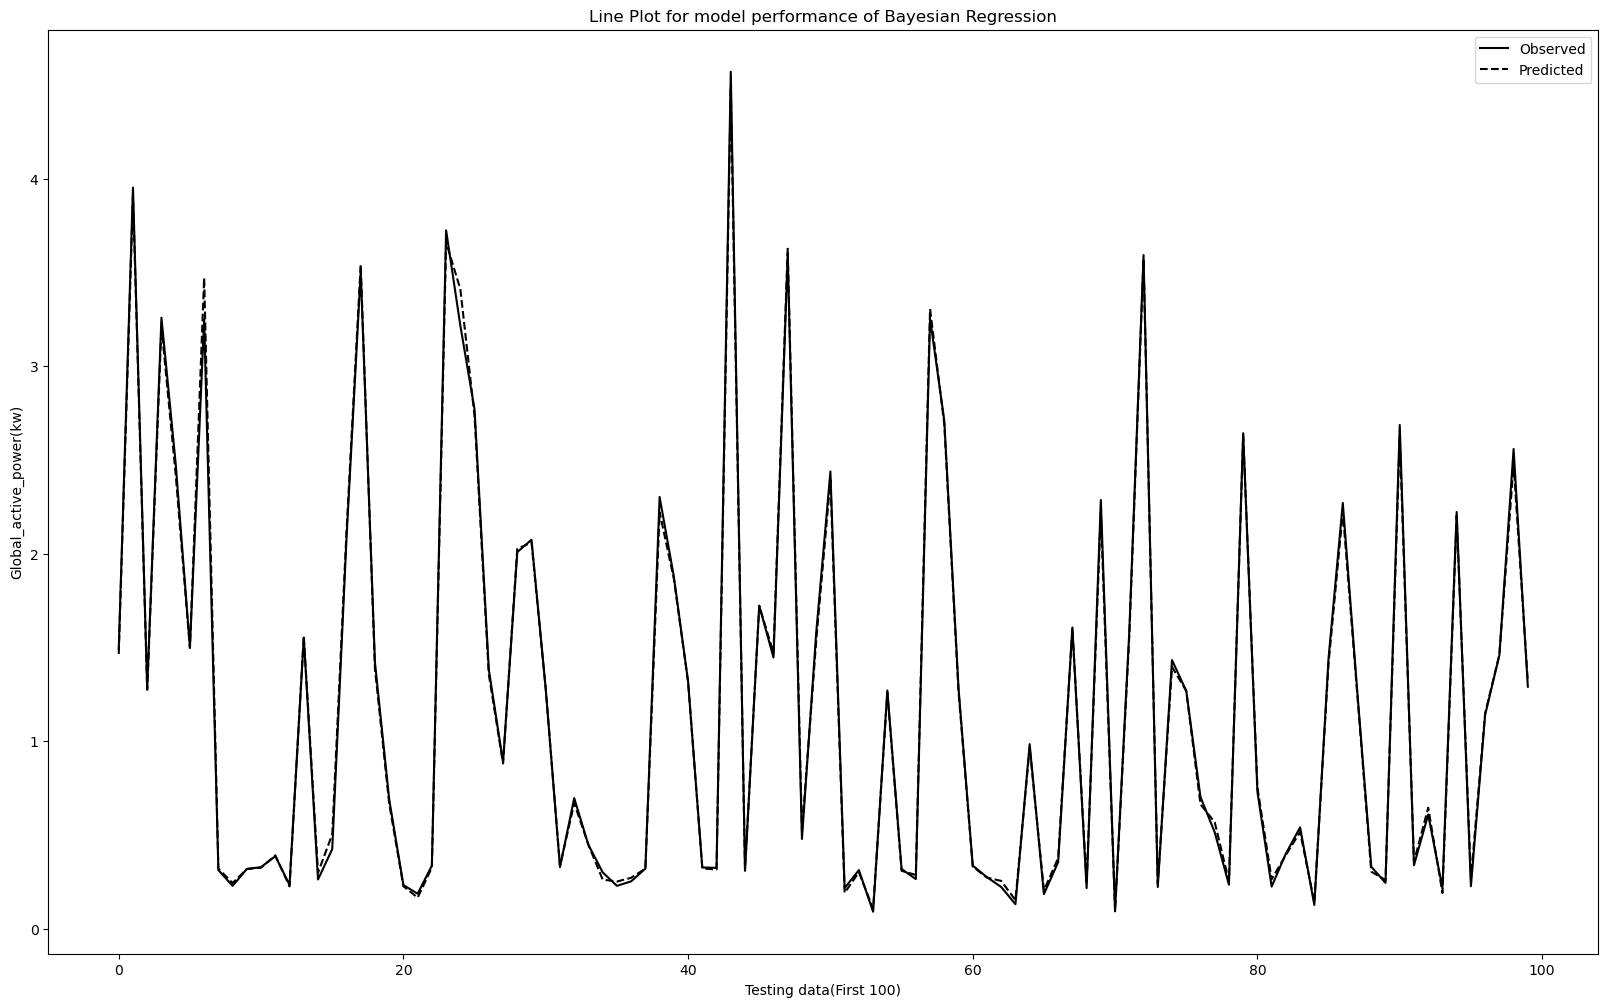

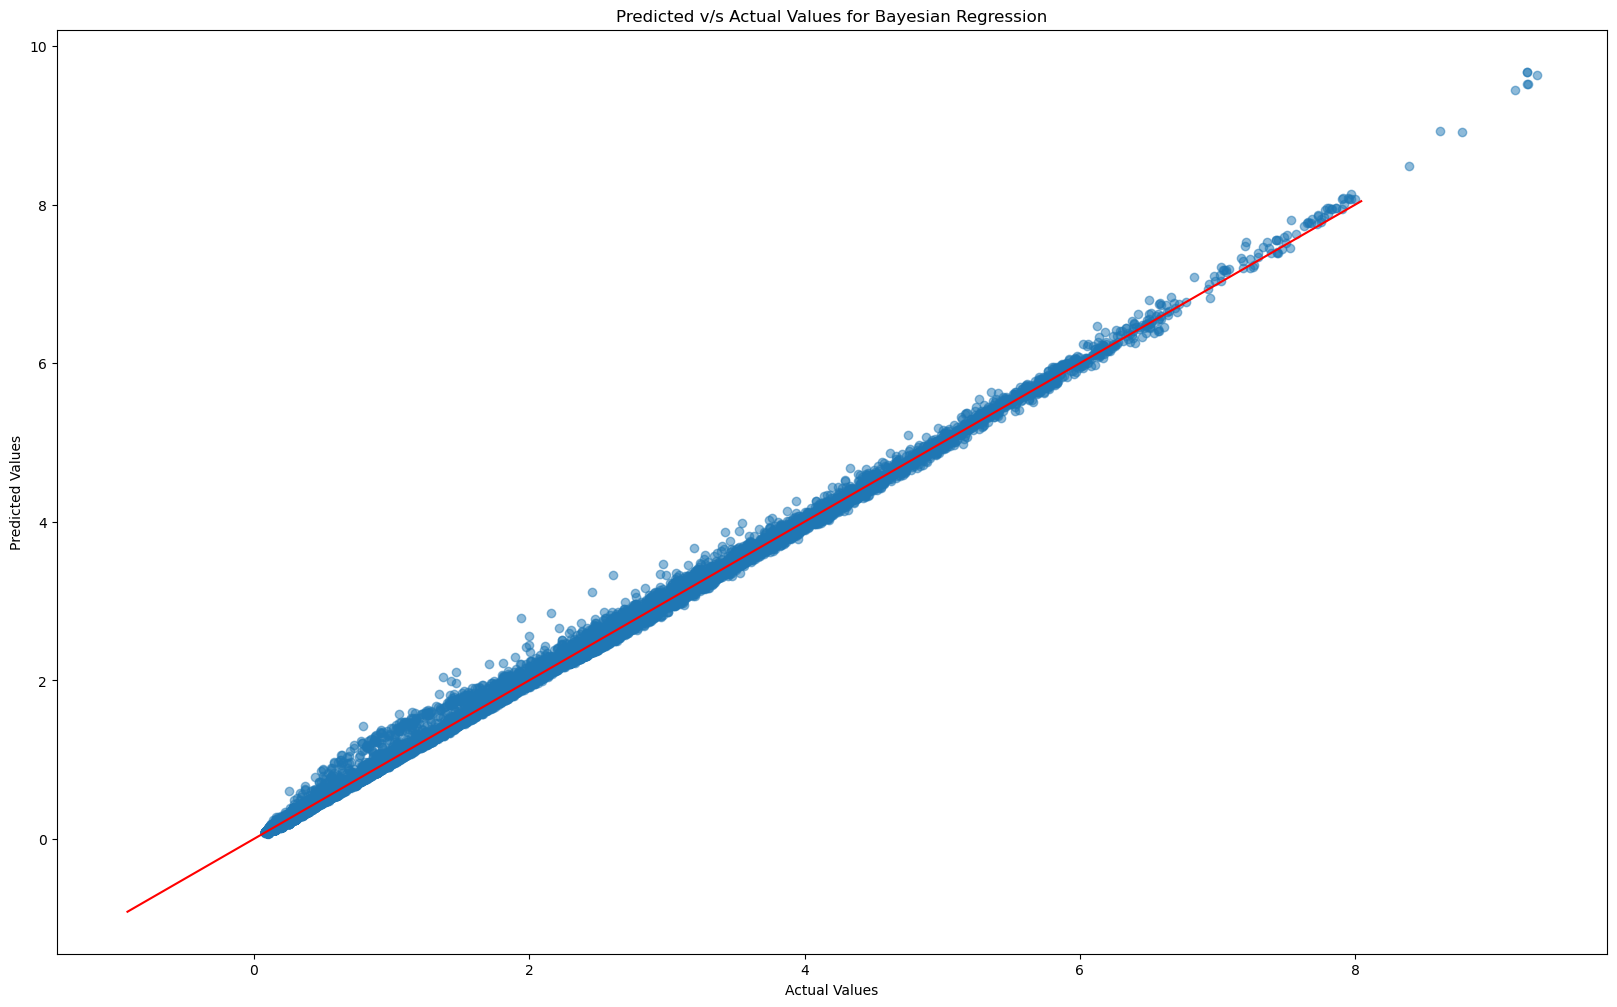

In [49]:
line_plot(ytest,bayesian_predictions, 'Line Plot for model performance of Bayesian Regression')
scatter(ytest,bayesian_predictions,'Predicted v/s Actual Values for Bayesian Regression')


In [50]:
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


Xtrain, Xtest, ytrain, ytest = train_test_split(df_copy[features], df_copy[target],random_state=1, test_size=0.2, shuffle=True)

lasso_model = Lasso(alpha=1.0)

lasso_model.fit(Xtrain, ytrain)



Lasso()

In [51]:
y_pred = lasso_model.predict(Xtest)

mse = mean_squared_error(ytest, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(ytest, y_pred)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2 score: {r2}")

MSE: 0.04617741125017581
RMSE: 0.21488929998996184
R2 score: 0.9669957186149313


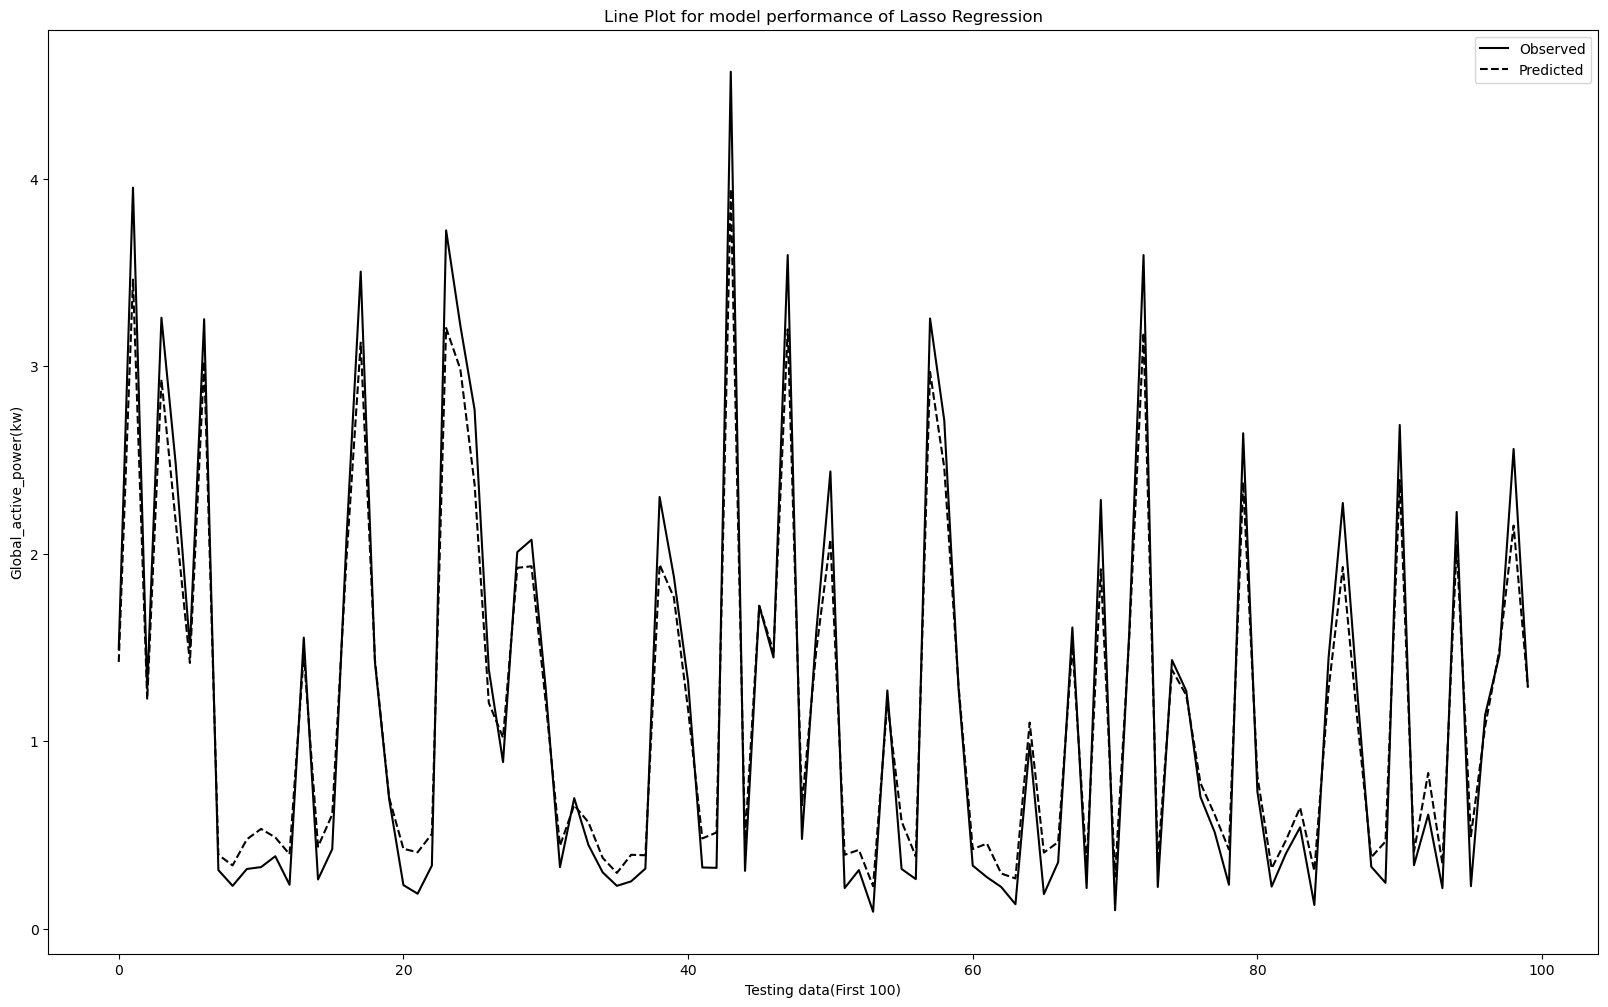

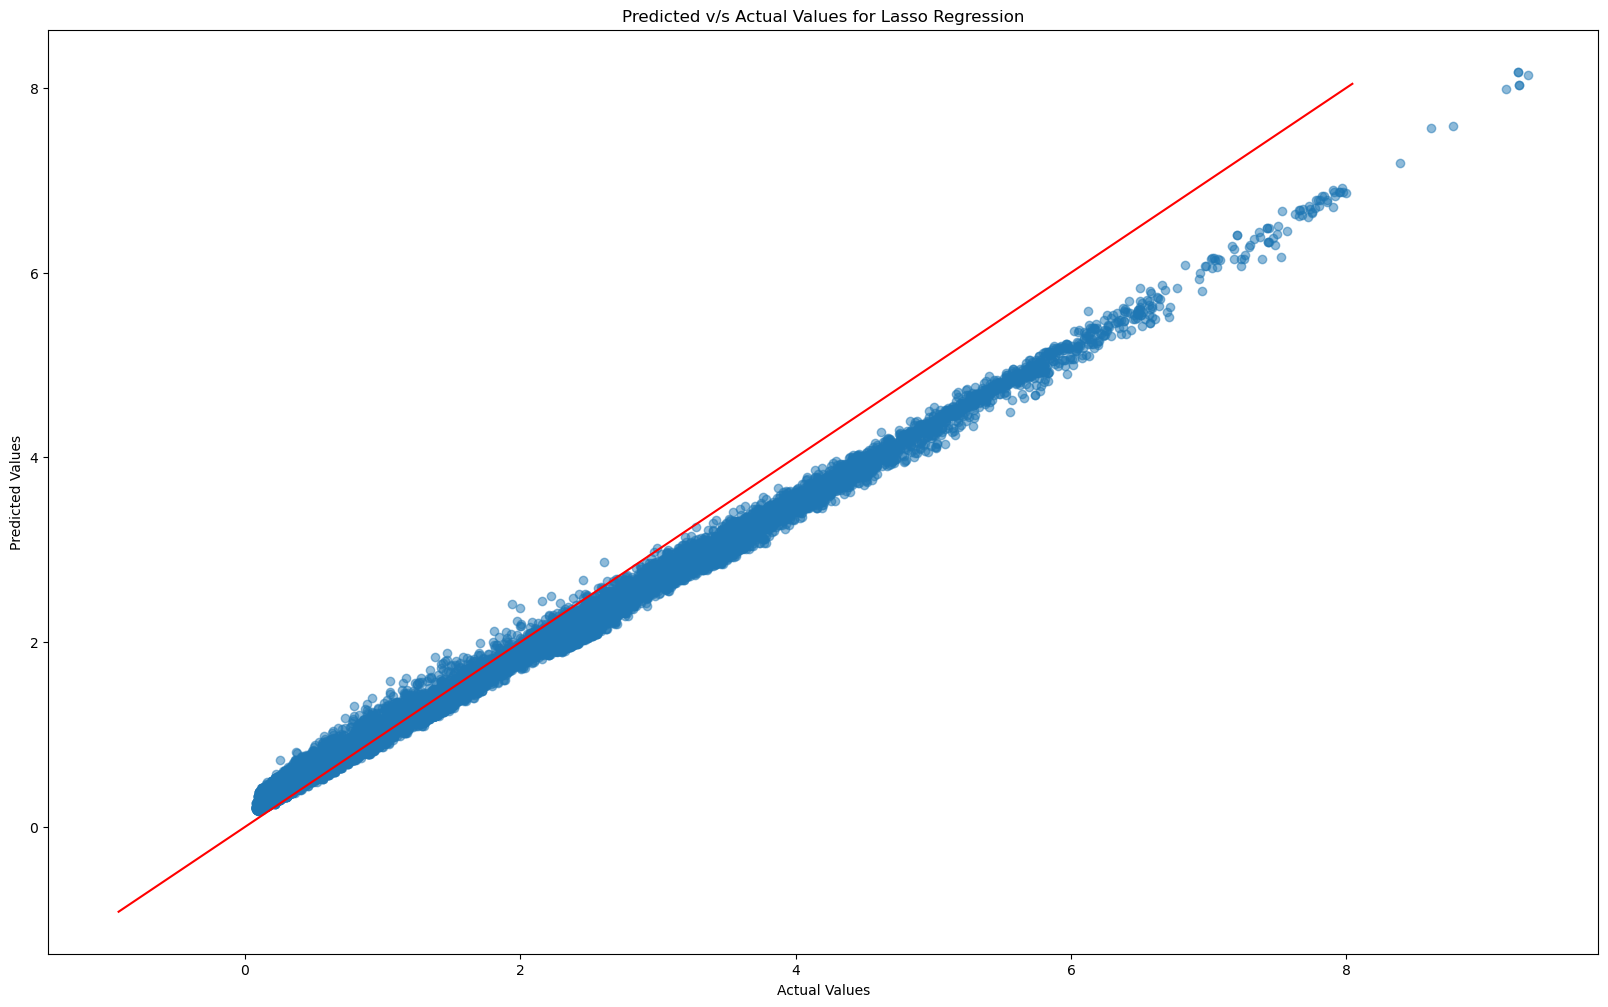

In [52]:
line_plot(ytest,y_pred, 'Line Plot for model performance of Lasso Regression')
scatter(ytest,y_pred,'Predicted v/s Actual Values for Lasso Regression')
# residue(ytest,y_pred, 'Residual Plot for Lasso Regression')